# Исследование данных о российском кинопрокате



Заказчик текущего исследования — Министерство культуры Российской Федерации. 

Задачи:
 - Необходимо изучить рынок российского кинопроката и выявить текущие тренды. 
 - Обратить внимание на фильмы, которые получили государственную поддержку. 
 - Проанлизировать, насколько фильмы, получившие государственну поддержку интересны зрителю. 

Для исследования представлены:
 - Данные, опубликованные на портале открытых данных Министерства культуры, содержащие информацию:
   - о прокатных удостоверениях, 
   - о сборах и государственной поддержке фильмов, 
   - с сайта КиноПоиск. 

Порядок действий:
 - Будет проведена предобработка данных с целью выявления аномалий и ошибок с последющим устранением. 
 - После предобработки будет проведен исследовательский анализ данных.

### 1. Загрузка данных и библиотек



In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', None)

In [2]:
try:
    df = pd.read_csv('...')
except:
    df = pd.read_csv('...')
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


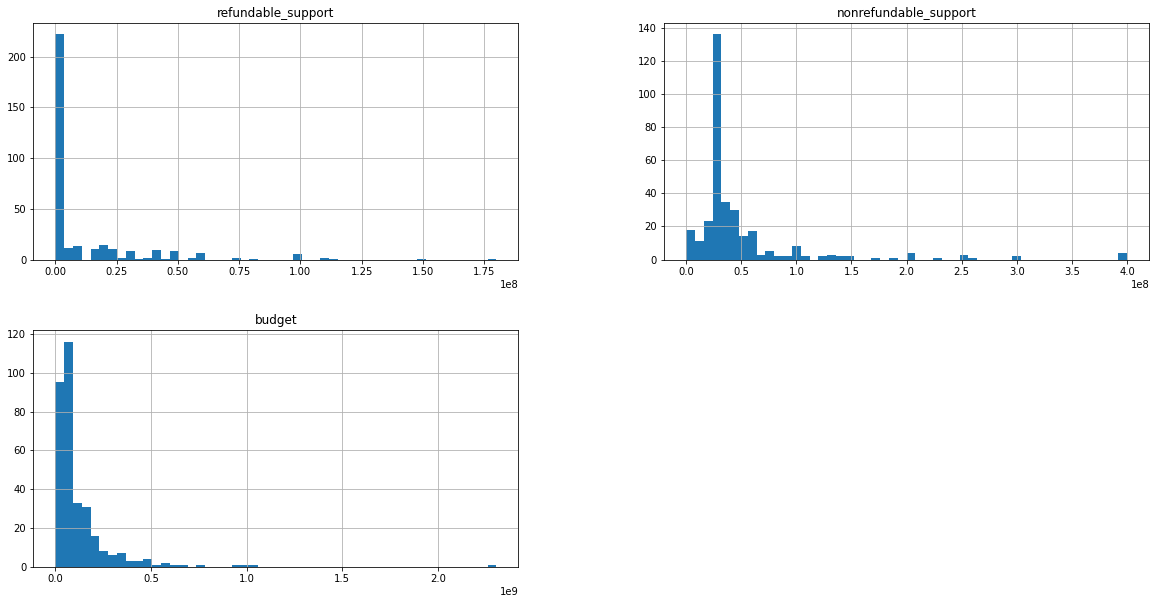

In [3]:
df.hist(figsize=(20,10), bins = 50);

In [4]:
try:
    df_num = pd.read_csv('...')
except:
    df_num = pd.read_csv('...')
df_num

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
...,...,...
3153,224014814,1.530000e+03
3154,224021411,9.270000e+03
3155,224022410,4.000000e+02
3156,224023210,3.600000e+02


In [5]:
df_num.isna().sum()

puNumber      0
box_office    0
dtype: int64

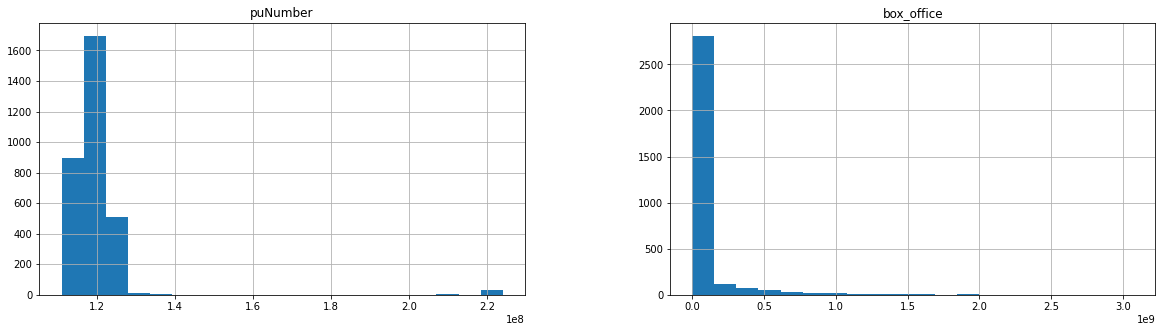

In [6]:
df_num.hist(figsize=(20, 5), bins = 20);

Первые наблюдения после загрузки датафреймов: </b>

- Формат даты выглядит некорректно;
- В первых строках датафрейма с фильмами сразу бросается дублирование названий одного фильма;
- Наличие пропусков в столбцах с поддержкой;
- Гистограммы построены только для трех финансовых столбцов - с поддержками и бюджетом;
- Отсутствие гистограмм для рейтингов говорит о том, что у столбца неверный тип данных;
- Гистограммы для второго датафрейма загружены корректно, однако для столбца puNumber, хоть и имееющего числовой тип, гистограмма неинформативна, так как значения ПУ это категориальные значения, а не числовые.


Наблюдения будут приняты и разобраны на этапе предобработки данных

### 2. Предобработка данных

Для удобства написания выводов введу условные сокращения:
- КП - КиноПоиск
- МК - Минкульт РФ
- ФК - Фонд Кино
- ПУ - Прокатное удостоверение
- ВП - Возвратная поддежка
- НВП - Невозвратная поддержка

#### 2.1 Проверка типов данных

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

**Выводы по типам данных**:

Во втором датасете смена типов данных не требуется. Для слияния таблиц потребуется в первом датасете сменть тип у `puNumber`.

Общий список столбцов, которым требуется смена типа:
- puNumber - на `int64`
- show_start_date - на `datetime64`
- ratings - на `float64`


##### 2.1.1 Тип данных `puNumber`

In [9]:
df['puNumber'].value_counts()

221154310    2
221054410    2
221031210    1
126001213    1
126000115    1
            ..
114000319    1
221091810    1
221013314    1
121028014    1
126005919    1
Name: puNumber, Length: 7484, dtype: int64

In [10]:
df['puNumber'].sort_values()

804      111004112
3962     111000110
4768     111000111
729      111000112
1128     111000113
           ...    
4355     226017410
3992     226019110
1011     231001012
5249     231001111
1797           нет
Name: puNumber, Length: 7486, dtype: object

В столбце с ПУ есть одно значение "нет", что осложняет переход в другой тип данных.

In [11]:
df.query('puNumber == "нет"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Изначально проблему мог решить, просто взяв номер с сайта МК. Но проведу еще проверку на дублирование. В итоге нахожу нужный фильм с уже имеющимся номером:

In [12]:
searchfor = ['Курбан-роман']
df[df['title'].str.contains('|'.join(searchfor))]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


В итоге присвою уже известный недостающй номер, взятый с сайта МК. Получается один фильм имеет два ПУ. К этому вопросу вернусь после слияния таблиц.

In [13]:
df['puNumber']=df['puNumber'].str.replace('нет', '111009614')

In [14]:
df['puNumber'] = df['puNumber'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Успешный перевод в числовой тип данных. 

In [15]:
#df.query('puNumber == 111009614')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

##### 2.1.2 Тип данных `show_start_date`

Дату приводим к нормальному виду

In [17]:
df['show_start_date'] = pd.to_datetime(df['show_start_date']).dt.date
df['show_start_date'] = pd.to_datetime(df['show_start_date']).dt.normalize()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


##### 2.1.3 Тип данных `ratings`

In [18]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [19]:
df['ratings']=df['ratings'].str.replace('%', '')

In [20]:
df['ratings']=df['ratings'].astype('float')
df.loc[df['ratings'] > 10, 'ratings'] = df['ratings']/10

In [21]:
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

Избавился от процентов, оценки выше 10 разделил на 10, а так же сменил тип данных

##### 2.1.4 Слияние таблиц

Слияние методом merge outer, для полного слияния таблиц по столбцу `puNumber`

In [22]:
df = df.merge(df_num, on='puNumber', how='outer')
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [23]:
df_num['puNumber'].value_counts()

121020416    1
121013618    1
121025916    1
121030014    1
111003010    1
            ..
124001014    1
124003318    1
111000314    1
124005116    1
121016318    1
Name: puNumber, Length: 3158, dtype: int64

После слияния проведу небольшой анализ сборов, чтобы увидеть на начальном этапе какие нибудь аномалии.

In [24]:
df_num['box_office'].describe()

count    3.158000e+03
mean     7.647870e+07
std      2.403531e+08
min      0.000000e+00
25%      8.623900e+04
50%      2.327988e+06
75%      2.397967e+07
max      3.073569e+09
Name: box_office, dtype: float64

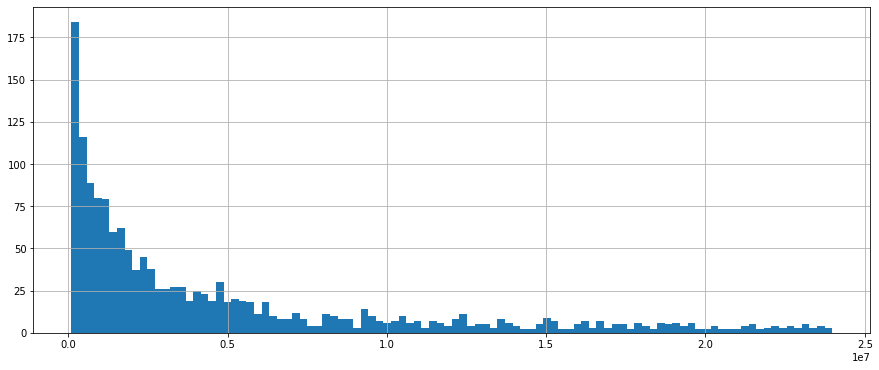

In [25]:
df['box_office'].hist(bins = 100, range =(100000,2.397967e+07),figsize = (15,6))
plt.ticklabel_format(style='sci')

<AxesSubplot:>

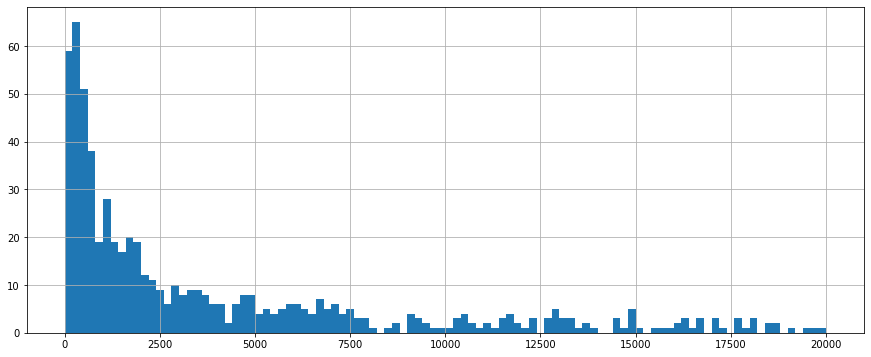

In [26]:
df['box_office'].hist(bins = 100, range =(0,20000),figsize = (15,6))

<AxesSubplot:>

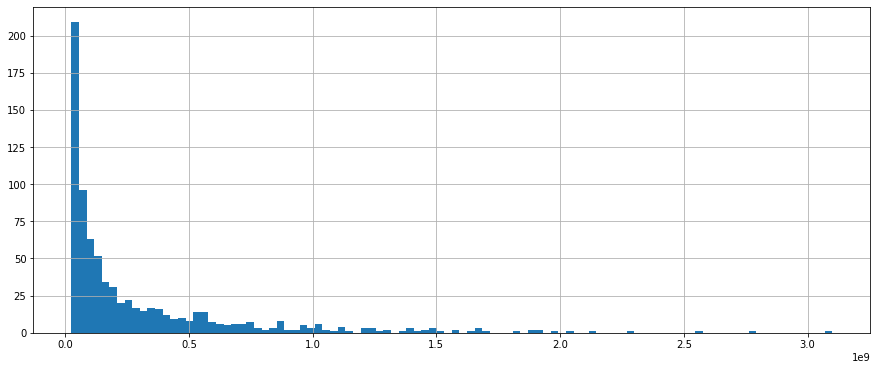

In [27]:
df['box_office'].hist(bins = 100, range =(2.5e+07,3.1e+09),figsize = (15,6))

В сборах бросаются в глаза числа меньше 20000 рублей. Для обычного кинозала на 100 мест и цене билета в 200 рублей при неполной рассадке сумму в 20000 можно набрать за пару сеансов.

In [28]:
df.query('box_office < 200000')['production_country'].count()

908

Разберусь с дублирующимися ПУ

In [29]:
print(df['puNumber'].value_counts())
df.query('puNumber == 221154310 or puNumber == 111009614 or puNumber == 221054410 ').head()

221154310    2
111009614    2
221054410    2
111008518    1
114002716    1
            ..
221015415    1
121021814    1
224028210    1
121013618    1
126002916    1
Name: puNumber, Length: 7483, dtype: int64


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),111009614,2014-05-15,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1798,Курбан-роман. (История с жертвой).,111009614,2014-09-02,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4638,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN


Присутствуют три случая дублирования ПУ.
1. Курбан-роман. (История с жертвой) - разница в дате. Актуальная дата выдачи ПУ 2014-09-02, согласно МК РФ.
Оценок на КП мало для формирования рейтинга. Разность дат релиза не выходит за пределы одного года, поэтому целесообразно удалить лишнюю строку, она не повлияет на общую картину.
2. Как жениться и остаться холостым имеет номер ПУ 121002007. "Иоанна..." имеет правильный номер. Проведу замену на актуальный номер.
3.Анализируй это! - разница в стране, рейтинге, названии. После сверки с информацией на КП строчку с рейтингм 7.4 оставляю как актулаьную, вторую удаляю. 

In [30]:
df['puNumber'] = np.where(df.title == 'Как жениться и остаться холостым', 121002007, df.puNumber)

При смене ПУ нашелся неявный дубликат (по дате выхода).

In [31]:
df.query('title == "Как жениться и остаться холостым"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4520,Как жениться и остаться холостым,121002007,2010-12-03,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4638,Как жениться и остаться холостым,121002007,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN


In [32]:
df = df.drop(index=[1797,5068,4638]).reset_index(drop=True)

Строки удаляю без опасений, так как в строках нет финансовых данных.

#### 2.2 Обработка пропусков

In [33]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7151
nonrefundable_support    7151
budget                   7151
financing_source         7151
ratings                   966
genres                    975
box_office               4325
dtype: int64

##### 2.2.1 Пропуски в `film_studio`

In [34]:
df.query('film_studio.isna()').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6102,Значит любит,111013818,2018-08-10,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6178,Несейка. Младшая дочь,112007018,2018-09-01,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6376,Ян Антонышев,112011818,2018-11-15,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Данные фильмы представляют собой или короткометражные, или документальные. Так же есть среди них несколько полнометражных фильмов, нужных данных о которых нет в известных источниках. На КП в основном у этих фильмов либо мало оценок, либо их нет совсем. Возможно данные фильмы сняты независимыми постановщиками, либо телеканалами ("Мульт Личности"). Целесообразно в графе `film_studio` вставить значение ***Независимый***

In [35]:
df['film_studio'] = df['film_studio'].fillna('Независимый')

Документальный фильм "Ян Антонышев" действительно имеет два ПУ. Но так как в остальных категориях идет полное совпадение, особенно в дате, то приведу значение `puNumber` к одному и потом удалю лишнюю строку, как дубликат.

##### 2.2.2 Пропуски в `production_country`

In [36]:
df.query('production_country.isna()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4440,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,Независимый,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Всего два пропуска. Не составит труда заполнить их, обратившись к тому же сайту МК.

In [37]:
df['production_country'] = df['production_country'].fillna(value = 'Россия')

##### 2.2.3 Пропуски в `director`

In [38]:
df.query('director.isna()').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.0
1735,Помпеи. Британский музей,126003413,2013-09-11,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df['director'][4415] = 'Энтони Бонжови'

In [40]:
df['director'] = df['director'].fillna(value = 'Неизвестен')

На англоязычном сайте удалось найти только режиссера концертного фильма Bon Jovi. Остальные фильмы являются либо концертными  либо фильмами, продюсерами в которых числятся определнные учжедения (Музей, театр, колледж). В официальных источниках (МК и КП) информации по данным фильмам нет. Так как пропусков очень мало, то заполню их значением ***Неизвестен***. При анализе столь малый процент пропусков (около **0,12%**)не повлияет ни на какие показатели. 

In [41]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                  568
age_restriction             0
refundable_support       7151
nonrefundable_support    7151
budget                   7151
financing_source         7151
ratings                   966
genres                    975
box_office               4325
dtype: int64

##### 2.2.4 Пропуски в столбцах `refundable_support`, `nonrefundable_support`,`budget` ,`financing_source` 

Финансовая поддержка оказывается двумя учреждениями - ФК и МК, либо их тандем. Поддержка оказывается фильмам,  cнимающимся в России, либо если Россия принимает участие в совместном производстве.

In [42]:
df.query('~(refundable_support.isna())')['production_country'].value_counts().head(30)

Россия                                        316
Россия, Италия                                  2
Россия, Германия                                2
Россия-Словакия-Чехия                           1
Россия, Франция, Латвия                         1
Россия, Сербия                                  1
Россия, Германия, Великобритания                1
Россия, Армения                                 1
Россия, Германия, Казахстан, Польша, Китай      1
Россия, Латвия, Чешская Республика              1
Россия, Бельгия, Финляндия                      1
Россия-Китай                                    1
Россия-Украина                                  1
Россия - Грузия                                 1
Россия, Украина, Польша                         1
Name: production_country, dtype: int64

В остальных столбцах ситуация будет такая же - Россия обязательно есть в списке стран, участвующих в создании картин.

In [43]:
df.query('(refundable_support.isna())')['production_country'].value_counts().head()

США               2171
Россия            1506
СССР               347
Франция            300
Великобритания     257
Name: production_country, dtype: int64

Естественно, что не все фильмы, даже снятые при участии России, получают поддержку. То же касается и зарубежных картин.

##### 2.2.5 Пропуски в `ratings`

In [44]:
df.query('(ratings.isna())')['type'].value_counts().head()

Анимационный       258
Художественный     213
Прочие             196
 Художественный    155
Документальный     126
Name: type, dtype: int64

Замечу следующее: изучение категориальных значений относится к шагу 2.4. Но так как сейчас уже видна проблема в столбце type, из-за которой искажается картина с пропусками, то необходимые операции обработки данных проведу сейчас.

In [45]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [46]:
df['type'] = df['type'].str.strip()

In [47]:
df.query('(ratings.isna())')['type'].value_counts().head()

Художественный       368
Анимационный         258
Прочие               196
Документальный       126
Научно-популярный     18
Name: type, dtype: int64

Какие предположения можно сделать по пропускам в рейтинге.
- Фильму поставили слишком мало оценок на КП, из-за чего рейтинг не был сформирован.
- Фильм вышел в повторный прокат, но дублирование оценки не произошло. Например, фильм "Мемуары Гейши" вышел в 2005 году, КП имеет все необходимые данные о прокате. Но год показа в таблице стоит 2012, из чего строю гипотезу, что ПУ выдано для повторого проката, возможно не массового.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483 entries, 0 to 7482
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7483 non-null   object        
 1   puNumber               7483 non-null   int64         
 2   show_start_date        7483 non-null   datetime64[ns]
 3   type                   7483 non-null   object        
 4   film_studio            7483 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7483 non-null   object        
 7   producer               6915 non-null   object        
 8   age_restriction        7483 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

Обнаружил, что есть небольшое количество строк, у которых нет жанра, но есть есть рейтинг. У некоторых даже есть сборы. Беглый просмотр по названиям, а так же дополнительная справка на КП дали основание присвоить строкам, у которых есть данные о прокате, жанр "короткометражка"

In [49]:
df.query('~(ratings.isna()) and genres.isna()').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1874,Короткие истории о любви 2,121002615,2015-02-13,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.3,NaN,1429859.0
2909,Аномия,111005216,2016-03-11,Художественный,Козлов Владимир Владимирович,Россия,В.Козлов,"Н.Муминова, А.Егай, В.Козлов",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,4.3,NaN,NaN
3259,Сборник короткометражек Кинотавра 18+,111012916,2016-08-19,Художественный,"ООО ""Кинометр""",Россия,"И.Каграманов, А.Наумов, С.Осипьян, В.Валиуллин...","И.Устинов, И.Каграманов, Е.Филлипова, Г.Стояло...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.2,NaN,1104161.0
3433,Сборник короткого метра. Оскар. Фильмы. 2017,121004117,2017-03-03,Художественный,"Куалиа Филмз, Марвин и Вейн, Эм энд Эм Продакш...",Франция - Испания - Дания - Венгрия - Швейцария,"С.Азази, Х.Г.Пене, К.Дик, Т. вон Гюнтен","С.Азази, Б.Лайарте, Х.Г.Пене, А.Мендиз, К.О.Ад...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,NaN,2322497.0
3438,Семь диких историй,126005916,2016-11-28,Прочие,"Макс Бэйкер, Джон Е.Брайан, Пьер-Луи Гарнон, ...",США - Пуэрто-Рико - Франция,"М.Бэйкер, Д.Е.Брайант, Д.Рондот, Я.Серсар, Д.С...","М.Бэйкер, Д.Е.Брайан, П.-Л.Гарнон, М.Х.Дельгад...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.8,NaN,1025937.0


In [50]:
df.loc[(df['genres'].isna())&(~df['ratings'].isna())&(~df['box_office'].isna()), 'genres'] = 'короткометражка'

##### 2.2.6 Пропуски в `producer`

In [51]:
df.query('producer.isna()')['production_country'].count()

568

Я решил провести групировку пропусков продюсеров по странам. Список выводит на первое место СССР. Но так как в топ-10 СССР входит три раза, то необходимо сначала отредактировать данные по странам, чтобы исключить неявные дубликаты. 

In [52]:
df.query('producer.isna()')['production_country'].value_counts().head(10)

СССР              342
Россия             38
Великобритания     33
США                24
СССР               20
Италия             16
Япония             10
Франция             8
СССР, ГДР           3
Австралия           3
Name: production_country, dtype: int64

In [53]:
df['production_country'].nunique()

950

Провел анализ столбца production_coutry.
Убрал лишние символы, отредактировал ошбики в названиях, привел разные названия одной страны к единому виду

In [54]:
df['production_country'] = df['production_country'].str.strip()
df['production_country'] = df['production_country'].str.replace(' - ', ', ')
df['production_country'] = df['production_country'].str.replace('-', ', ')
df['production_country'] = df['production_country'].str.replace(' , ', ', ')
df['production_country'] = df['production_country'].str.replace('Ю.Корея', 'Корея')
df['production_country'] = df['production_country'].str.replace('Южная Корея', 'Корея')
df['production_country'] = df['production_country'].str.replace('Китай', 'КНР')
df['production_country'] = df['production_country'].str.replace('К;анада', 'Канада')
df['production_country'] = df['production_country'].str.replace('CША', 'США')#возможно буквы С и А в в английской раскладке
df['production_country'] = df['production_country'].str.replace('2019', 'Германия')
df['production_country'] = df['production_country'].str.replace('Порртугалия', 'Португалия')
df['production_country'] = df['production_country'].str.replace('Республика Кипр', 'Кипр')
df['production_country'] = df['production_country'].str.replace('Республика Корея', 'Корея')
df['production_country'] = df['production_country'].str.replace('  Шри, Ланка', ' Шри-Ланка')
df['production_country'] = df['production_country'].str.replace('Голландия', 'Нидерланды')
df['production_country'] = df['production_country'].str.replace(',  ', ', ')
df['production_country'] = df['production_country'].str.replace('Норвения', 'Норвегия')
df['production_country'] = df['production_country'].str.replace('Объединенные Арабские Эмираты', 'ОАЭ')
df['production_country'] = df['production_country'].str.replace('Пуэрто, Рико', 'Пуэрто-Рико')
df['production_country'] = df['production_country'].str.replace('Пуэрто Рико', 'Пуэрто-Рико')
df['production_country'] = df['production_country'].str.replace('Босния, Герцеговина', 'Босния и Герцеговина')
df['production_country'] = df['production_country'].str.replace('СЩА', 'США')
df['production_country'] = df['production_country'].str.replace('Сша', 'США')
df['production_country'] = df['production_country'].str.replace('Республика Беларусь', 'Беларусь')
df['production_country'] = df['production_country'].str.replace('Республика Казахстан', 'Казахстан')
df['production_country'] = df['production_country'].str.replace('Н.Зеландия', 'Новая Зеландия')
df['production_country'] = df['production_country'].str.replace('Белоруссия', 'Беларусь')
df['production_country'] = df['production_country'].str.replace('Германя', 'Германия')
df['production_country'] = df['production_country'].str.replace('Бенльгия', 'Бельгия')
df['production_country'] = df['production_country'].str.replace('Корея', 'Южная Корея')
df['production_country'] = df['production_country'].str.replace('Республика Армения', 'Армения')
df['production_country'] = df['production_country'].str.replace('Республика Узбекистан', 'Узбекистан')

In [55]:
print(df['production_country'].nunique())

788


In [56]:
df.query('producer.isna()')['production_country'].value_counts().head(60)

СССР                                                                372
Россия                                                               38
Великобритания                                                       33
США                                                                  24
Италия                                                               17
Япония                                                               10
Франция                                                               8
СССР, ГДР                                                             3
Австралия                                                             3
СССР, Польша                                                          2
Франция, Бельгия                                                      2
СССР, Швеция                                                          2
Франция, Италия, Великобритания, США                                  2
СССР, Венгрия                                                   

Если посмотреть топ-50 стран по пропускам продюсера, то выходит, что на СССР приходится 372 пропуска как на единственную страну,и как минимум 20 - в кооперации с другими странами. Это дает около 70% пропусков. В СССР кинопроизводство  контролировало государство, так что оно и выполняло продюсерские функции. 
Касательно других стран - продюсером вполне может быть и режиссер. Практика довольно распространненая, особенно для независимых картин. В нынешнем исследовании нам не требуется полный список продюсеров, поэтому пропуски можно не трогать.

##### 2.2.7 Пропуски в `genres`

In [57]:
df['type'] = df['type'].str.strip()

In [58]:
df['type'].value_counts()

Художественный                5906
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [59]:
df.query('type == "Музыкально-развлекательный"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6621,Баския: Взрыв реальности,126004118,2019-01-17,Музыкально-развлекательный,Магнолия Пикчерз,США,Сара Драйвер,"Рэйчел Денгиз, Сара Драйвер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.9,документальный,1416635.0


Тип фильма "Музыкально-развлекательный" для фильма Баския: Взрыв реальности выглядит довольно подозрительно, потому что картина как минимум рассказыает о худжнике, а не о музыканте. И это документальный фильм.
К тому же на всю таблицу это единственное значение.
Мое суждение может быть субъективным, я не смотрел этот фильм. Но чтобы эта единственная строка не мешала, поменяю для нее тип на "документальный"

In [60]:
df['type'] = df['type'].str.replace('Музыкально-развлекательный', 'Документальный')

In [61]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный'], dtype=object)

38% пропусков приходится на художественные фильмы.
55% пропусков приходится на фильмы производства РФ

Существуют пропуски у жанров для фильмов типа "документальный" и "научно-популярный". 
Так как столбец `type` без пропусков, приму его за приоритет. Если тип фильма документальный, то и по логике одним из жанров должен быть "документальный". А раз данных вообще никаких нет, то как минимум один жанр можно вставить и закрыть пропуск. 


In [62]:
df.query('genres.isna() and type == "Научно-популярный"').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3321,Подвиг Евгения Кобытева,113000117,2017-04-12,Научно-популярный,"ООО ""ЛИСПО""",Россия,Д.Хананов,С.Лившиц,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3803,"Добро пожаловать, Ю.Гагарин!",113000110,2010-01-28,Научно-популярный,"Киностудия ""Центрнаучфильм""",СССР,Д.Боголепов,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5402,Разыскивается филин,113000317,2017-07-14,Научно-популярный,"ООО ""ТВпорт""",Россия,"М.Барынин, И.Цыганов","М.Корчагина, Е.Фёдорова, М.Моргун, А.Куренков",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5403,Куба. Индекс счастья,113000417,2017-07-14,Научно-популярный,"ООО ""ТВпорт""",Россия,Н.Кузнецова,"А.Бессчетнова, М.Евдокимова, А.Куренков",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6016,Сибирские сябры,113000118,2018-07-20,Научно-популярный,Алтайское краевое отделение общероссийской общ...,Россия,В.Кузнецов,В.Кузнецов,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df.loc[(df['type'] == 'Документальный')|(df['type'] == 'Научно-популярный')&(df['genres'].isna()), 'genres'] = 'документальный'

In [64]:
print(df.query('genres.isna()')['type'].count())
print()
print(df.query('genres.isna()')['type'].value_counts().head(60))
df.query('genres.isna()')['production_country'].value_counts().head(10)

826

Художественный    372
Анимационный      258
Прочие            196
Name: type, dtype: int64


Россия            399
Великобритания     65
США                64
Италия             59
Россия, Кипр       26
Кипр               22
Германия           14
Франция            12
СССР               12
Австралия          10
Name: production_country, dtype: int64

Вряд ли есть фильмы, у которых невозможно найти информацию о жанре. Скорее всего пропуски являются следствием ошибок при начальном составления датасетов.

In [65]:
df.duplicated().sum()

0

##### 2.2.8 Пропуски `box_office`

In [66]:
df_11 = df[df['title'].str.contains('Гарри')]
df_22 = df[df['title'].str.contains('Мемуары гейши')]
df_11.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
109,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,221004916,2016-02-09,Художественный,"Уорнер Бразерс, Хэйдей Филмз","США, Великобритания",Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"фэнтези,приключения,семейный",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23,Художественный,"Уорнер Бразерс, Хэйдей Филмз","США, Великобритания",Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"фэнтези,приключения,семейный",759526.0
111,Гарри Поттер и тайная комната /По роману Дж.К....,121026016,2016-09-23,Художественный,"Уорнер Бразерс, Хедэй Филмз/1492 Пикчерз",США,Крис Коламбус,Дейвид Хейман,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.0,"фэнтези,приключения,семейный",1093810.0
112,Гарри Поттер и узник Азкабана /По роману Дж.К....,221005016,2016-02-09,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"фэнтези,приключения,семейный",NaN
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"фэнтези,приключения,семейный",1125302.0


In [67]:
df_22

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Выдвину несколько предположений наличия пропусков в данных о прокате.
- Основной прокат фильма был до 2010 года. Присутствие таких фильмов в списке может говорить о повторном прокате. Например фильмы Особо Опасен(2008), Мемуары гейши(2005), а так же фильмы о Гарри Поттере, 6 из которых выходили в официальнй прокат до 2010 года. Не все картины попадают под это условие. Есть ряд картин, вышедших в СССР, у которых есть данные по прокату. Пусть и очень скромные, даже аномально скромные.

In [68]:
df.query('~box_office.isna() and production_country == "СССР"').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
18,Неподдающиеся,111003616,2016-02-12,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.0,"мелодрама,комедия",360.0
19,Неподсуден,111003716,2016-02-12,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,420.0
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.7,"комедия,мелодрама,криминал",380.0
38,Мужики!..,111007213,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.1,драма,1165.0


In [69]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                  568
age_restriction             0
refundable_support       7151
nonrefundable_support    7151
budget                   7151
financing_source         7151
ratings                   966
genres                    826
box_office               4325
dtype: int64

Замена пропусков в данных о прокате приемлема только в случае, если есть официальные данные. Учитывая, что пропуски составляют больше **55%**, то и ручное редактирование так же неприемлемо. Поэтому пропуски остаются без каких либо изменений.

#### 2.3 Анализ дубликатов

Если изначально проверить ДФ на явные дубликаты, то их нет

In [70]:
df.duplicated().sum()

0

Вернемся к фильму "Ян Антонышев"

In [71]:
df.query('puNumber == 112011818 or title == "Ян Антонышев"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6376,Ян Антонышев,112011818,2018-11-15,Документальный,Независимый,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,документальный,NaN
6377,Ян Антонышев,112011918,2018-11-15,Документальный,Независимый,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,документальный,NaN


Проведу замену номеров прокатных удостоверений

In [72]:
df['puNumber'] = df['puNumber'].replace(112011818, 112011918)

In [73]:
df.query('puNumber == 112011918')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6376,Ян Антонышев,112011918,2018-11-15,Документальный,Независимый,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,документальный,NaN
6377,Ян Антонышев,112011918,2018-11-15,Документальный,Независимый,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,документальный,NaN


In [74]:
df.duplicated().sum()

1

In [75]:
df = df.drop_duplicates().reset_index(drop=True)

Поиск неявных дубликатов в названии достаточно труден. 
- Можно провести чистку от лишних пробелов и других символов.
- Дело осложняют прокатные удостоверения, которые могут быть выданы одному фильму в разное время его проката.
- Названия могут быть одинаковыми у разных фильмов.

По итогу избавляюсь от лишних символов в конце названий.

In [76]:
df['title'].nunique()

6770

In [77]:
df['title'] = df['title'].str.strip('._/,:')

In [78]:
df['title'] = df['title'].str.strip()

In [79]:
df['title'].nunique()

6677

Минус 93 дубликата названий.

In [80]:
#Обнаружен явный дубликат, удаляю.
df.duplicated().sum()

0

In [81]:
df= df.drop_duplicates().reset_index(drop=True)

In [82]:
df.duplicated().sum()

0

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7482 entries, 0 to 7481
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7482 non-null   object        
 1   puNumber               7482 non-null   int64         
 2   show_start_date        7482 non-null   datetime64[ns]
 3   type                   7482 non-null   object        
 4   film_studio            7482 non-null   object        
 5   production_country     7482 non-null   object        
 6   director               7482 non-null   object        
 7   producer               6914 non-null   object        
 8   age_restriction        7482 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [84]:
df['title'].value_counts().head(50)

День святого Валентина                                        5
Волшебная страна                                              5
Двойной копец                                                 4
Соблазнитель                                                  4
Робин Гуд (Robin Hood)                                        4
Красавчик-2                                                   4
Рапунцель: Запутанная история                                 4
Белая мгла /По комиксу Грега Рукка и Стива Либера             4
Дом грёз                                                      4
Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг    4
Начало                                                        4
Король Лев                                                    4
Хаббл 3D                                                      4
Знакомство с Факерами 2                                       4
Жена путешественника во времени                               4
Там, где живут чудовища                 

Некоторые названия принадлежат одному фильму с разными ПУ, некоторые могут относиться к разным фильмам.

In [85]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                  568
age_restriction             0
refundable_support       7150
nonrefundable_support    7150
budget                   7150
financing_source         7150
ratings                   965
genres                    826
box_office               4324
dtype: int64

#### 2.4 Анализ категориальных значений

Основные проблемы в категориальных значениях решены выше.

In [86]:
df['financing_source'].unique() 

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

#### 2.5. Анализ количественных значений на предмет аномалий

В столбце`budget` есть 17 нулевых значений. При этом для них характероно
- наличие значений в столбцах с поддежкой - либо только возвратная/невозвратная, либо обе.
- наличие значений в столбце `box_office`

Возможно, что представленные цифры поддержки и являются полностью бюджетом этих фильмов. Поэтому нулевые значения заменю на сумму обеих поддержек. Удаление приведет к пропаже данных по прокату, оставление без изменений вызовет ошибку при расчете отношения сборов к бюджету.

Другая бросающая в глаза информация - сборы меньше 10 000 рублей.

Подозрительный данные бросаются в глаза в столбце `box_office`

In [87]:
df['box_office'].describe()

count    3.158000e+03
mean     7.647870e+07
std      2.403531e+08
min      0.000000e+00
25%      8.623900e+04
50%      2.327988e+06
75%      2.397967e+07
max      3.073569e+09
Name: box_office, dtype: float64

In [88]:
df.query('box_office < 8.567150e+04')['box_office'].describe()

count      789.000000
mean     13070.437009
std      20338.899431
min          0.000000
25%        740.000000
50%       3300.000000
75%      14900.000000
max      85153.000000
Name: box_office, dtype: float64

Если взять выборку сборов голливдуских картин, то картина выглядит странной. В списке есть достаточно много блокбастеров, но данных о сборах у них неадекватно маленькие, если сравнивать с официальными данными с КП.

In [89]:
df.query('box_office < 10000 and production_country == "США" ').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
436,Искатели могил,121004112,2012-02-15,Художественный,Диджитал Интерференс,США,Вишес Бразерс,"Сван Анджелски, Майкл Карлин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.4,"ужасы,триллер",550.0
479,Голодные игры,121005712,2012-02-28,Художественный,"Колор Форс, Ладжер Зен Лайф Продакшн, Лайонсге...",США,Гэри Росс,"Нина Джейкобсон, Джон Килик",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,"фантастика,боевик,триллер",760.0
501,Ворон-,121009612,2012-04-11,Художественный,Филм Нейшнл Интернэшнл,США,Джеймс МакТиг,"Марк Д. Эванс, Тревор Мэйси, Аарон Райдер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"фэнтези,боевик,драма",1600.0
510,Мадагаскар 3,124001112,2012-04-27,Художественный,ДримУоркс Анимейшн,США,"Эрик Дарнелл, Том МакГрат, Конрад Вернон","Мирей Сория, Марк Свифт",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.4,"мультфильм,комедия,приключения",3590.0
515,Ночь в супермаркете,124001212,2012-05-02,Анимационный,"Си 47 Продакшнз, Лайнс Гейт Фэмили Интертейнме...",США,Лоуренс Казанофф,"Джордж Джонсен, Лоуренс Казанофф, Элисон Сэвич...",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,1.6,"мультфильм,комедия,семейный",620.0


Есть определенное количество картин советских, которых очевидно выпускали в повторный прокат. Но почему такие сборы, почти по цене билета, остается загадкой. Возможно не дописали нули, а возможно люди просто не ходили. Ведь можно посмотреть дома например.

In [90]:
df.query('box_office < 10000 and production_country == "СССР" ').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
18,Неподдающиеся,111003616,2016-02-12,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.0,"мелодрама,комедия",360.0
19,Неподсуден,111003716,2016-02-12,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,420.0
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.7,"комедия,мелодрама,криминал",380.0
38,Мужики!,111007213,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.1,драма,1165.0


In [91]:
df.query('budget == 0').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10234016.1
2058,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,446163511.0
2471,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",196572438.4
2531,Бармен,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",67418974.8
2614,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184487551.4


In [92]:
df['budget'].describe()

count    3.320000e+02
mean     1.272297e+08
std      1.885883e+08
min      0.000000e+00
25%      4.200000e+07
50%      6.864992e+07
75%      1.419853e+08
max      2.305074e+09
Name: budget, dtype: float64

Аномальные на первый взгляд бюджеты перестают выглядеть таковыми, когда выясняется, каким фильмам они принадлежат.
Все фильмы являются блокбастерами, даже скандальная "Матильда". Для "Втожения" неизвестен прокат.Его заполню вручную, так как с точки зрения анализа фильм хорошо отразится на графиках, так как сборы были большие. 

In [93]:
df.query('budget > 9e+08')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5434,Матильда,111005717,2017-08-17,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,110000000.0,190000000.0,1.032906e+09,Фонд кино,7.7,"фэнтези,комедия,семейный",5.117755e+08
7110,Тайна Печати Дракона,111012819,2019-09-12,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...","Россия, КНР",О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.0,90000000.0,2.305074e+09,Фонд кино,5.8,"приключения,фэнтези",3.335971e+08
7460,Союз спасения,111022019,2019-12-26,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,9.800000e+08,Фонд кино,6.0,"история,биография,драма",7.177032e+08
7470,Вторжение,111022519,2019-12-23,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,9.440000e+08,Фонд кино,5.7,"фантастика,боевик",NaN


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7482 entries, 0 to 7481
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7482 non-null   object        
 1   puNumber               7482 non-null   int64         
 2   show_start_date        7482 non-null   datetime64[ns]
 3   type                   7482 non-null   object        
 4   film_studio            7482 non-null   object        
 5   production_country     7482 non-null   object        
 6   director               7482 non-null   object        
 7   producer               6914 non-null   object        
 8   age_restriction        7482 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [95]:
df['nonrefundable_support'].describe()

count    3.320000e+02
mean     4.898099e+07
std      5.998012e+07
min      0.000000e+00
25%      2.500000e+07
50%      3.000000e+07
75%      4.037500e+07
max      4.000000e+08
Name: nonrefundable_support, dtype: float64

In [96]:
df.query('0 < nonrefundable_support < 5e+06 or nonrefundable_support > 4e+07').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5
1870,А зори здесь тихие,111002915,2015-03-16,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,50000000.0,100000000.0,220588394.0,Фонд кино,8.5,"драма,военный,история",249166767.7
1871,Две женщины,111013714,2014-10-02,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.0,46502299.0,86210067.0,"Министерство культуры, Фонд кино",6.7,драма,4731239.5
1903,Призрак,111001815,2015-03-02,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.0,75000000.0,139551503.0,Фонд кино,7.0,"триллер,боевик,приключения",352804320.4
2058,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,446163511.0


- Максимальная НВП составляет 400 млн. рублей
- Минимальная НВП составляет 3 млн. рублей.

In [97]:
df.query('0 < refundable_support < 4e+06 or refundable_support > 1.5e+07').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1870,А зори здесь тихие,111002915,2015-03-16,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,50000000.0,100000000.0,220588394.0,Фонд кино,8.5,"драма,военный,история",249166767.7
1987,Елки Лохматые,111023114,2014-12-10,Художественный,"ООО ""ТаББаК""",Россия,Максим Свешников,"Тимур Бекмамбетов, Евгения Аронова",«6+» - для детей старше 6 лет,26000000.0,30000000.0,80000000.0,Фонд кино,5.0,"семейный,комедия",121225633.8
2005,Снежная Королева 2: Перезаморозка,114000214,2014-11-13,Анимационный,"ООО ""ВИЗАРТ ФИЛЬМ""",Россия,А.Цицилин,"ООО ""ВИЗАРТ ФИЛЬМ"", ООО ""ТаББаК""",«0+» - для любой зрительской аудитории,30000000.0,40000000.0,252489571.0,Фонд кино,6.5,"мультфильм,фэнтези,приключения",313489846.5
2141,Территория,111000515,2015-01-27,Художественный,"ООО ""Творческое объединение ""Кинокомпания ""Анд...",Россия,А.Мельник,А.Мельник,«12+» - для детей старше 12 лет,30000000.0,30000000.0,500000000.0,Фонд кино,6.8,"детектив,фэнтези,триллер",72578317.4
2531,Бармен,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",67418974.8


In [98]:
df['refundable_support'].describe()

count    3.320000e+02
mean     1.186446e+07
std      2.491656e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      1.800000e+08
Name: refundable_support, dtype: float64

- Максимальная ВП составляет 180 млн. рублей.
- Минимальная ВП составляет 3,5 млн. рублей.


In [99]:
df.query('1e+08 < refundable_support < 2e+08').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3163,Герой (2015),111000416,2016-01-22,Художественный,"ООО ""Студия 25"", ООО ""Медиа Арт Студио"", ООО ...",Россия,Ю.Васильев,"Э.Айнулова, Н.Дорошкевич, М.Журомская",«12+» - для детей старше 12 лет,110000000.0,30000000.0,2.221778e+08,"Министерство культуры, Фонд кино",7.1,"мюзикл,боевик,драма",8.143063e+07
3350,Дуэлянт,111015416,2016-09-14,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,150000000.0,300000000.0,6.842005e+08,Фонд кино,6.6,драма,3.642851e+08
5434,Матильда,111005717,2017-08-17,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,110000000.0,190000000.0,1.032906e+09,Фонд кино,7.7,"фэнтези,комедия,семейный",5.117755e+08
6468,Три богатыря и наследница престола,114008818,2018-12-15,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,К.Бронзит,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,115000000.0,0.0,1.855007e+08,Фонд кино,6.5,"мультфильм,приключения,семейный",5.773689e+08
7110,Тайна Печати Дракона,111012819,2019-09-12,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...","Россия, КНР",О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.0,90000000.0,2.305074e+09,Фонд кино,5.8,"приключения,фэнтези",3.335971e+08


Для любого государства важно иметь развитую киноиндустрию, так как кино несет на себе как культурно-просветительскую, так и социально-политическую функции. Кино нужно государству одновременно для позиционирования себя в международном пространстве и для создания определенной культурной атмосферы у граждан собственной страны.

Помимо этого, МК и ФК занимаются развитием киноиндустрии еще и с точки зрения экономики. Российское кинопроизводство и кинопрокат в своем нынешнем положении нуждаются в поддержке государства - эта функция государством реализуется за счет финансирования кинопроизводства, помощи во внутреннем и международном прокате, инвестировании открытия кинотеатров в отдаленных населенных пунктах и пр.

Соответственно, фильмы, которые государство финансирует на безвозвратной основе наиболее ярко отражают ценности, которые оно пытается взрастить в российском обществе.
Заинтересованность государства в создании всех этих фильмов легко объясняется потребностью создавать патриотическое кино.

У некоторых фильмов впрочем объяснить наличие НВП и ВП иногда сложно.

#### 2.6 Добавление столбцов

- Создаем столбец с информацией о годе проката. 
- Выделяем год из даты премьеры фильма.

In [100]:
df.insert(3, "year", (df['show_start_date'].dt.year))
#df.head()

- Создаем два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [101]:
df[['main_director','main_genre']] = df[['director','genres']].apply(lambda x: x.str.split(',',expand = True)[0])

- Изучаем, какую долю от общего бюджета фильма составляет государственная поддержка.

В графе бюджет 17 нулевых значений. При этом есть данные как минимум в одном из столбцов, связанных с поддержкой. На основании этих данных присвою нулевым значениям значения из столбцов поддержки.

In [102]:
df.query('budget == 0').head()

,title,puNumber,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre
2053,14+,111023614,2014-12-19,2014,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10234016.1,А.Зайцев,мелодрама
2058,Дуxless 2,111000415,2015-01-26,2015,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,446163511.0,Р.Прыгунов,драма
2471,Воин (2015),111017315,2015-09-28,2015,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",196572438.4,А.Андрианов,боевик
2531,Бармен,111009615,2015-05-26,2015,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",67418974.8,Д.Штурманова,комедия
2614,Савва. Сердце воина,114001715,2015-07-21,2015,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184487551.4,М.Фадеев,мультфильм


In [103]:
for row in df['budget']:
    if row == 0:
        df['budget'] = df['refundable_support']+df['nonrefundable_support']

Далее создаю два столбца:
 - `support_ratio` - покажет процентное соотношение всей поддержки к бюджету. 100% означает, что бюджет состоит целиком из поддержки государства.
 - `box_ratio` - покажет отношение сборов фильма к его бюджету. 
  - box_ratio < 1  - фильм не окупил затраты
  - box_ratio = 100  - фильм отбил затраты
  - box_ratio > 1  - фильм принес прибыль

In [104]:
df['support_ratio'] = round(((df['refundable_support']+df['nonrefundable_support'])/df['budget'])*100)
df['box_ratio'] = round((((df['box_office'])/df['budget'])),4)
df.query('~(budget.isna())').head()

,title,puNumber,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre,support_ratio,box_ratio
1281,Пока еще жива,111005313,2013-10-11,2013,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,26500000.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,А.Атанесян,драма,100.0,0.0138
1448,Бесславные придурки,111003314,2014-03-28,2014,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,26000000.0,Министерство культуры,NaN,NaN,28140.0,А.Якимчук,NaN,100.0,0.0011
1498,Невидимки,111004213,2013-09-10,2013,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,107847945.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,Р.Давлетьяров,комедия,100.0,0.1850
1524,БЕРЦЫ,111004314,2014-05-05,2014,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,28000000.0,Министерство культуры,4.2,драма,55917.5,Е.Миндадзе (псевдоним Катя Шагалова),драма,100.0,0.0020
1792,Братья Ч,111004414,2014-04-23,2014,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,25000000.0,Министерство культуры,6.4,драма,232100.0,М.Угаров,драма,100.0,0.0093


200 картин, не окупивших затраты

In [105]:
df.query('box_ratio < 1 ').head()

,title,puNumber,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre,support_ratio,box_ratio
1281,Пока еще жива,111005313,2013-10-11,2013,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,26500000.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,А.Атанесян,драма,100.0,0.0138
1448,Бесславные придурки,111003314,2014-03-28,2014,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,26000000.0,Министерство культуры,NaN,NaN,28140.0,А.Якимчук,NaN,100.0,0.0011
1498,Невидимки,111004213,2013-09-10,2013,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,107847945.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,Р.Давлетьяров,комедия,100.0,0.1850
1524,БЕРЦЫ,111004314,2014-05-05,2014,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,28000000.0,Министерство культуры,4.2,драма,55917.5,Е.Миндадзе (псевдоним Катя Шагалова),драма,100.0,0.0020
1792,Братья Ч,111004414,2014-04-23,2014,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,25000000.0,Министерство культуры,6.4,драма,232100.0,М.Угаров,драма,100.0,0.0093


Самый кассовый фильм, с самым большим box_ratio

In [106]:
df.query('title == "Холоп"')

,title,puNumber,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre,support_ratio,box_ratio
7452,Холоп,111021719,2019-12-19,2019,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.0,35000000.0,60000000.0,Фонд кино,6.8,комедия,3.073569e+09,К.Шипенко,комедия,100.0,51.2261


In [107]:
df.query('~(budget.isna()) and box_office.isna()').head()

,title,puNumber,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre,support_ratio,box_ratio
2799,Золотая рыбка (2015),111018715,2015-10-29,2015,Художественный,"ООО ""Кинокомпания Дебют""",Россия,А.Галибин,Б.Токарев,«12+» - для детей старше 12 лет,0.0,25000000.0,25000000.0,Министерство культуры,6.3,драма,NaN,А.Галибин,драма,100.0,NaN
3336,Любовь и Сакс,111001217,2017-02-16,2017,Художественный,"ООО ""ДжемСтудия""",Россия,А.Сурикова,А.Голутва,«12+» - для детей старше 12 лет,0.0,10000000.0,10000000.0,Министерство культуры,5.2,мелодрама,NaN,А.Сурикова,мелодрама,100.0,NaN
3710,Колобанга. Только для пользователей Интернета ...,214010116,2016-10-06,2016,Анимационный,"ООО ""Колобанга""",Россия,А.Романец,А.Ревва,«0+» - для любой зрительской аудитории,0.0,11520000.0,11520000.0,Министерство культуры,7.0,"мультфильм,приключения,детектив",NaN,А.Романец,мультфильм,100.0,NaN
5658,"Детский юмористический киножурнал ""ЕРАЛАШ"", вы...",111011917,2017-12-26,2017,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, В.Панжев, Г.Курлаев, С.Морозов, М.С...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,0.0,25000000.0,25000000.0,Министерство культуры,7.2,"детский,комедия",NaN,Е.Соколов,детский,100.0,NaN
6472,Зима,111023518,2019-03-15,2019,Художественный,"ООО ""КиноТрест""",Россия,С.Черников,"З.Болотаев, А.Плотников, Н.Агеев, А.Горский, П...",«16+» - для детей старше 16 лет,0.0,25000000.0,25000000.0,Министерство культуры,5.2,"драма,криминал",NaN,С.Черников,драма,100.0,NaN


Среди фильмов, получивших поддержку, есть 14 картин с отсутствущими данными по сборам. На это можно было бы не обратить особого внимания, если бы в списке этом не было "Вторжения", одного из громких блокбастеров 2019 года. Отсутствие данных об этом фильме может сильно повлиять на дальнейший анализ. Так как пропусков немного, есть резон обратиться к КиноПоиску за недостающими данными.

Заполнение делаю следующим образом: 
- если есть данные по бюджету  - обновяляю данные
- данные по сборам буду умножать на курс долллара на момент выхода, так как данные о сборах на КП представлены в долларах

Решил заполнить пропуски по индексам. С одной стороны индекс один, в отличие от возможных нескольких названий или ПУ. Но с другой стороны, если до этого шага будут изменения в количестве строк, то индексы придется так же вручную править. Это не очень удобно.

In [108]:
#Зима
df['box_office'][6472] = 21743*65
df['budget'][6472] = 397000000
#Мальчик русский
df['box_office'][6705] = 29368*65
df['budget'][6705] = 46941140
#Танец с саблями
df['box_office'][6964] = 43000*65
df['budget'][6964] = 61571449
#Куратор
df['box_office'][7005] = 2382*65
df['budget'][7005] = 60668576
#На Луне 
df['box_office'][7225] = 27190*65
#Кроличья лапа
df['box_office'][7340] = 14985*65
df['budget'][7340] = 47734050
#Вторжение
df['box_office'][7470] = 32649672*65
df['budget'][7470] = 944000000
#Неидеальный мужчина
df['box_office'][7474] = 15767966*65
df['budget'][7474] = 150147502

In [109]:
df.query('~(budget.isna()) and box_office.isna()').head()

,title,puNumber,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre,support_ratio,box_ratio
2799,Золотая рыбка (2015),111018715,2015-10-29,2015,Художественный,"ООО ""Кинокомпания Дебют""",Россия,А.Галибин,Б.Токарев,«12+» - для детей старше 12 лет,0.0,25000000.0,25000000.0,Министерство культуры,6.3,драма,NaN,А.Галибин,драма,100.0,NaN
3336,Любовь и Сакс,111001217,2017-02-16,2017,Художественный,"ООО ""ДжемСтудия""",Россия,А.Сурикова,А.Голутва,«12+» - для детей старше 12 лет,0.0,10000000.0,10000000.0,Министерство культуры,5.2,мелодрама,NaN,А.Сурикова,мелодрама,100.0,NaN
3710,Колобанга. Только для пользователей Интернета ...,214010116,2016-10-06,2016,Анимационный,"ООО ""Колобанга""",Россия,А.Романец,А.Ревва,«0+» - для любой зрительской аудитории,0.0,11520000.0,11520000.0,Министерство культуры,7.0,"мультфильм,приключения,детектив",NaN,А.Романец,мультфильм,100.0,NaN
5658,"Детский юмористический киножурнал ""ЕРАЛАШ"", вы...",111011917,2017-12-26,2017,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, В.Панжев, Г.Курлаев, С.Морозов, М.С...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,0.0,25000000.0,25000000.0,Министерство культуры,7.2,"детский,комедия",NaN,Е.Соколов,детский,100.0,NaN
7176,Байкал - Сердце мира 3D,112004619,2019-11-01,2019,Документальный,"ООО ""Продюсерский центр ""Новое Время""",Россия,А.Попова,"И.Добровольский, А.Разуваева, Ю.Перкуль",«0+» - для любой зрительской аудитории,0.0,3000000.0,3000000.0,Министерство культуры,8.0,документальный,NaN,А.Попова,документальный,100.0,NaN


У оставшихся тайтлов отстствуют данные в открытых источниках. Пропуски оставляем. Тайтлы относятся либо к телепроектам, либо к документальым фильмам.

In [110]:
df.query('title == "Вторжение"')

,title,puNumber,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre,support_ratio,box_ratio
4549,Вторжение,221149610,2010-12-15,2010,Художественный,"Оливер Пикчерз, Виллидж Роадшоу Пикчерз, Верти...","США, Австралия","Оливер Хиршбигель, Джеймс МакТиг",Джоэл Силвер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.7,"фантастика,боевик",NaN,Оливер Хиршбигель,фантастика,NaN,NaN
5427,Вторжение,124002417,2017-08-01,2017,Анимационный,Баобаб Студиос,США,Эрик Дарнелл,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,5.7,"фантастика,боевик",NaN,Эрик Дарнелл,фантастика,NaN,NaN
7470,Вторжение,111022519,2019-12-23,2019,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",2.122229e+09,Ф.Бондарчук,фантастика,100.0,NaN


In [111]:
df['budget'].describe()

count    3.320000e+02
mean     6.373118e+07
std      8.605735e+07
min      3.000000e+06
25%      2.580000e+07
50%      3.500000e+07
75%      6.000000e+07
max      9.440000e+08
Name: budget, dtype: float64

In [112]:
df.query('budget > 9e+08')

,title,puNumber,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre,support_ratio,box_ratio
7470,Вторжение,111022519,2019-12-23,2019,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",2.122229e+09,Ф.Бондарчук,фантастика,100.0,NaN


Картин, не окупившихся: 199


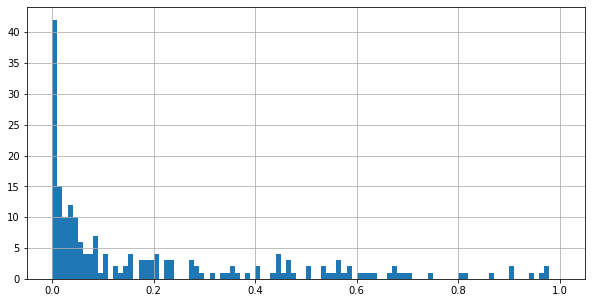

In [113]:
df['box_ratio'].hist(bins = 100, figsize = (10,5),range=(0,1))
plt.ticklabel_format(style='plain')
print("Картин, не окупившихся:",df.query('0 < box_ratio < 1')['title'].count())

Картин, окупивших затраты не более чем в 10 раз: 104


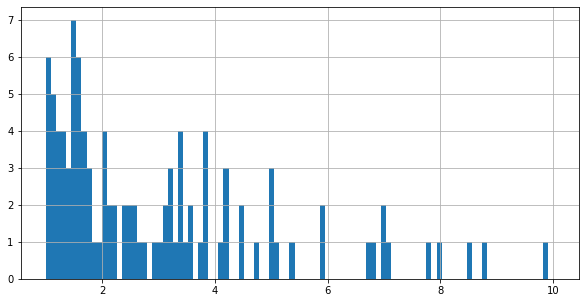

In [114]:
df['box_ratio'].hist(bins = 100, figsize = (10,5),range=(1,10))
plt.ticklabel_format(style='plain')
print("Картин, окупивших затраты не более чем в 10 раз:",df.query('1 < box_ratio <= 10')['title'].count())

Картин, окупивших затраты более чем в 10 раз: 14


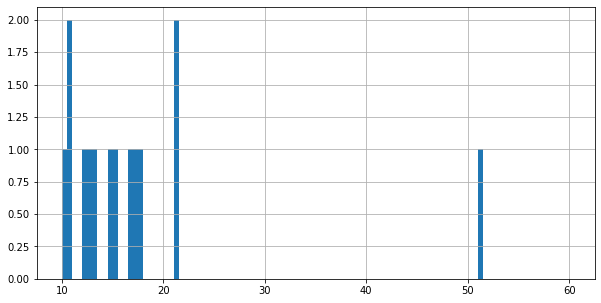

In [115]:
df['box_ratio'].hist(bins = 100, figsize = (10,5),range=(10,60))
plt.ticklabel_format(style='plain')
print("Картин, окупивших затраты более чем в 10 раз:",df.query('10 < box_ratio <= 60')['title'].count())

In [116]:
df.query('10 < box_ratio <= 60').head()

,title,puNumber,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre,support_ratio,box_ratio
2131,Битва за Севастополь,111001415,2015-02-20,2015,Художественный,"ООО ""Кинокомпания ""Новые люди"", ООО ""Студия ""К...","Россия, Украина",С.Мокрицкий,"Н.Мокрицкая, Е.Олесов",«12+» - для детей старше 12 лет,0.0,27510000.0,27510000.0,Министерство культуры,7.5,"биография,военный,драма",401804461.9,С.Мокрицкий,биография,100.0,14.6058
2204,8 новых свиданий,111014914,2014-10-30,2014,Художественный,"ООО ""Смарт ТВ Продакшн""",Россия,М.Бальчюнас,"ООО ""Грин Филмс"", ООО ""ПЦ ""Горад""",«12+» - для детей старше 12 лет,0.0,30000000.0,30000000.0,Фонд кино,6.0,комедия,393344626.3,М.Бальчюнас,комедия,100.0,13.1115
2700,Самый Лучший День,111017815,2015-10-14,2015,Художественный,"ООО ""ТаББаК""",Россия,А.Першин (псевдоним Ж.Крыжовников),"Т.Бекмамбетов, А.Першин (псевдоним Ж.Крыжовник...",«16+» - для детей старше 16 лет,29000000.0,34000000.0,63000000.0,Фонд кино,4.7,"комедия,музыка",683029061.4,А.Першин (псевдоним Ж.Крыжовников),комедия,100.0,10.8417
2857,28 Панфиловцев,111000916,2016-01-27,2016,Художественный,Индивидуальный Предприниматель Шальопа А.Г.,Россия,"К.Дружинин, А.Шальопа",А.Шальопа,«12+» - для детей старше 12 лет,0.0,30000000.0,30000000.0,Министерство культуры,7.5,"военный,драма,история",363622804.9,К.Дружинин,военный,100.0,12.1208
3104,Иван Царевич и Серый Волк 3,114004115,2015-12-24,2015,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,Д.Шмидт,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,0.0,40000000.0,40000000.0,Фонд кино,6.2,"мультфильм,приключения,семейный",704928216.0,Д.Шмидт,мультфильм,100.0,17.6232


In [117]:
df.duplicated().sum()

0

### 3. EDA


Для удобства уберу лишний текст из `age_restriction`. Цифры передают суть отлично, а лишний текст только загромождает графики

In [118]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [119]:
def age(row):
    try:
        if '18+' in row:
            return '18+'
        elif '16+' in  row:
            return '16+'
        elif '12+' in row:
            return '12+'
        elif '6+' in row:
            return '6+'
        elif '0+' in row:
            return '0+'
    except:
        return 'нет категории'

In [120]:
df['age_restriction']=df['age_restriction'].apply(age)

In [121]:
df['age_restriction'].unique()

array(['18+', '6+', '12+', '16+', '0+'], dtype=object)

#### 3.1 Количество фильмов по годам

- Выясняем, сколько фильмов выходило в прокат каждый год.  
- Рассчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах (данные о прокате в кинотеатрах известны не для всех фильмов)

Text(0.5, 1.0, 'Количество фильмов вышедших 2010-2019 гг.')

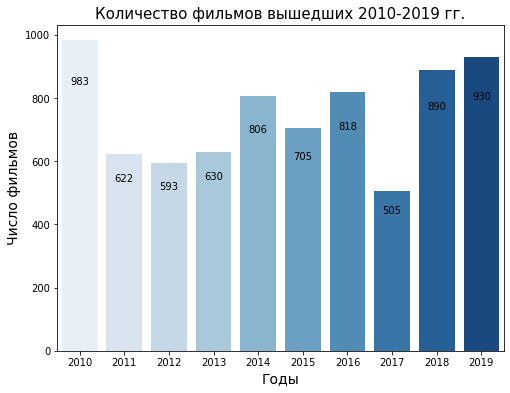

In [122]:
df_count = df.groupby(['year']).agg(count=('puNumber', 'count'))
df_count = df_count.reset_index()
df_count

plt.figure(figsize=(8, 6))
sns.barplot(x="year", y="count", 
            data=df_count,
            palette='Blues')

def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')
ax = plt.gca()
autolabel(ax.patches, height_factor=0.85)

plt.ylabel("Число фильмов", size=14)
plt.xlabel("Годы", size=14)
plt.title("Количество фильмов вышедших 2010-2019 гг.", size=15)

Больше всего фильмов выходило в 2010 году, меньше всего в 2017. 
Если проверить на дубликаты названий, то получается, что цифры 2010 года обусловлены большим количеством повторных прокатов, так как у фильма может быть несколько ПУ. В 2017м году видимо повторно не выдавали ПУ, а в 2019м их выдано намного меньше, чем в 2010м, при этом количество вышедших картин наоброт близко к значению 2010 года.

In [123]:
print('2010 год')
print(df.query('year==2010')['title'].value_counts().head(10))
print()
print('2017 год')
print(df.query('year==2017')['title'].value_counts().head(10))
print()
print('2019 год')
df.query('year==2019')['title'].value_counts().head(10)

2010 год
День святого Валентина                               5
Шерлок Холмс                                         4
Секс в большом городе 2                              4
Белая мгла /По комиксу Грега Рукка и Стива Либера    4
Непокоренный                                         4
Кошки против собак: Месть Китти Галор                4
Начало                                               4
Аватар                                               3
Шаг вперед 3D                                        3
Железный человек 2 (по комиксам Стэна Ли)            3
Name: title, dtype: int64

2017 год
Вижу лишь тебя                                              1
И смех и грех                                               1
Реальная белка 2                                            1
Зверопой                                                    1
Мой ангел                                                   1
Телохранитель киллера                                       1
Машины Страшилки. Серия "Грозная 

Прощание                                    2
Мысленный волк                              2
Любовницы                                   2
Ночь живых мертвецов                        2
Выше неба                                   2
Маняшино озеро                              1
Машины песенки. Серия "Испанские мотивы"    1
Доживём до понедельника                     1
Фееринки. Серия "Волшебный сундук"          1
Крик тишины                                 1
Name: title, dtype: int64

Так же можно увидеть топ-10 жанров вышедших фильмов. Драма преобладает с большим отрывом.

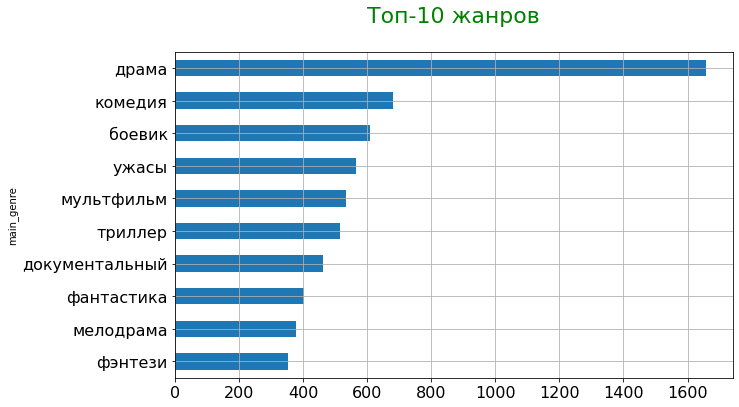

In [124]:
top_genres = df['main_genre'].iloc[:].value_counts(ascending = False)[0:10]
top_main_genre = (df
             .query('main_genre in (@top_genres.index)')
             .pivot_table(index = 'main_genre',
                          values = 'title',
                          aggfunc = 'count')
              .sort_values(by = 'title', ascending = True)
              .plot(kind = 'barh', figsize = (10,6), legend = False, fontsize = 16, grid = True)
              .set_title('Топ-10 жанров' + "\n", fontsize = 22, color = 'Green')
             )

#### 3.2 Доля фильмов с даными о прокате и без. Изменение доли по годам.

Создам столбец с булевым значением - наличие/отсуствие сборов. 

In [125]:
def box(row):
    if row > 0:
        return True
    else:
        return False 

In [126]:
df['box_info']=(df['box_office'].apply(box)).astype('bool')

In [127]:
df['box_info'].unique()

array([False,  True])

array([<AxesSubplot:ylabel='year'>], dtype=object)

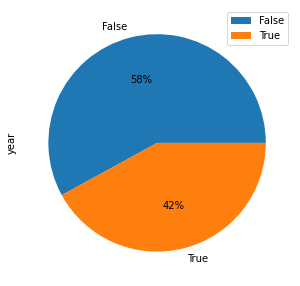

In [128]:
(df.pivot_table(index = 'box_info', 
                values = 'year', 
                aggfunc = 'sum')
 .plot(kind = "pie", autopct='%1.0f%%', subplots = True, figsize = (5,5))
)

Данные о прокате отсутствуют у **58%** записей.

In [129]:
#Высчитаю процентное соотношение по каждому году:
df.pivot_table(index = "year",
              values = 'box_info',
              aggfunc = 'mean')


,box_info
year,
2010,0.102747
2011,0.175241
2012,0.207420
2013,0.284127
2014,0.338710
2015,0.655319
2016,0.641809
2017,0.706931
2018,0.533708


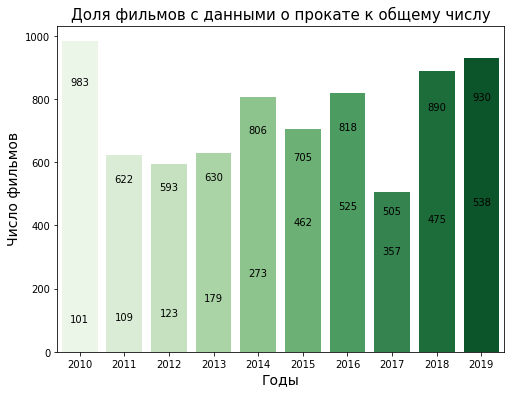

In [130]:
df_box = df.groupby(['year']).agg(count=('box_info', 'sum'), vi = ('box_info', 'count') )
df_box = df_box.reset_index()
df_box

plt.figure(figsize=(8, 6))
sns.barplot(x="year", y="count", 
            data=df_box,
            palette='Greens')

sns.barplot(x="year", y="vi", 
            data=df_box,
            palette='Greens')

def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')
ax = plt.gca()
autolabel(ax.patches, height_factor=0.85)

plt.ylabel("Число фильмов", size=14)
plt.xlabel("Годы", size=14)
plt.title("Доля фильмов c данными о прокате к общему числу", size=15);

Нижнее значение отражает количество картин, имеющих данные о прокате, верхее - общее количество картин.
- С 2015 года процент наличия данных о прокате держится выше отметки в **50%.** 
- В 2017 году процент максимальный, почти **70%.**

     box_info        mean
          sum count      
year                     
2010      101   983  10.0
2011      109   622  18.0
2012      123   593  21.0
2013      179   630  28.0
2014      273   806  34.0
2015      462   705  66.0
2016      525   818  64.0
2017      357   505  71.0
2018      475   890  53.0
2019      538   930  58.0


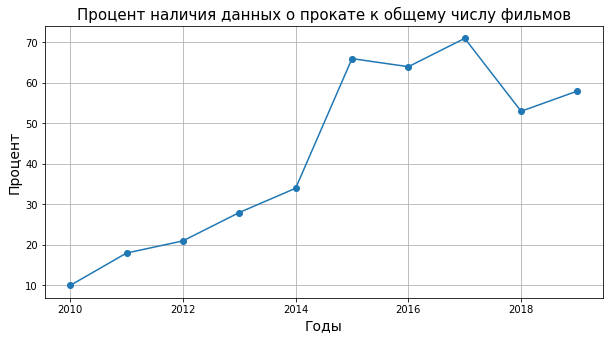

In [131]:
df_box_sum = (df.groupby('year')
              .agg({'box_info':['sum','count']})
             )
df_box_sum['mean'] = round(df.groupby('year')['box_info'].mean()*100)
print(df_box_sum)
df_box_sum['mean'].plot(kind = 'line',
                        style = 'o-', 
                        grid = True, 
                        figsize = (10,5))
plt.ylabel("Процент", size=14)
plt.xlabel("Годы", size=14)
plt.title("Процент наличия данных о прокате к общему числу фильмов", size=15);

          sum    count
     box_info box_info
year                  
2010      101      983
2011      109      622
2012      123      593
2013      179      630
2014      273      806
2015      462      705
2016      525      818
2017      357      505
2018      475      890
2019      538      930


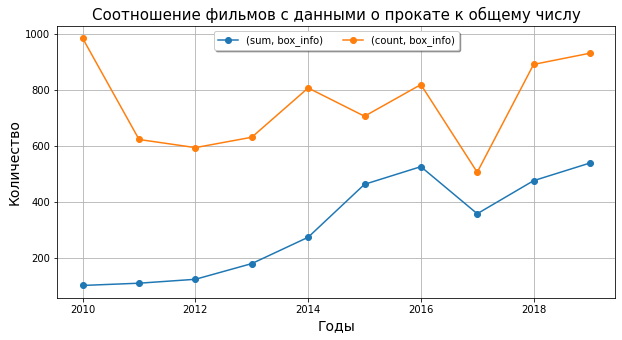

In [132]:
df_box_sum = (df.pivot_table(index = 'year',
              values = 'box_info',
              aggfunc = ['sum','count'])
             )
print(df_box_sum)
df_box_sum= df_box_sum.plot(kind = 'line', style = 'o-', grid = True, figsize = (10,5))
df_box_sum.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00),
          ncol=3, fancybox=True, shadow=True)
plt.ylabel("Количество", size=14)
plt.xlabel("Годы", size=14)
plt.title("Соотношение фильмов с данными о прокате к общему числу", size=15);

Численно  на 2017 год приходится меньше всего записей о вышедших фильмах. При этом на этот год приходится самый большой процент наличия данных о прокате.
Если проверить год на наличие фильмов, имеющих несколько ПУ, то выяснится, что таковых нет. Это значит, что фильм выпускался в прокат один раз.

Так же видно, в 2014 году было выпущено в повторный прокат большое количество советсвких картин.

In [133]:
df.query('production_country == "СССР"')['year'].value_counts().head(20)

2014    163
2013     60
2015     56
2016     42
2017     26
2010     13
2019     13
2011      4
Name: year, dtype: int64

#### 3.3 Динамика проката по годам. Максимальная/минимальная сумма по годам

- Рассмотрим динамику проката по годам, вычислив, в каком году сумма сборов была минимальной, а в каком - максимальной.

AxesSubplot(0.125,0.125;0.775x0.755)


,box_office
year,
2010,2.428654e+06
2011,1.410276e+07
2012,6.955423e+06
2013,2.979971e+07
2014,7.444952e+09
2015,3.949737e+10
2016,4.786630e+10
2017,4.856371e+10
2018,4.966840e+10


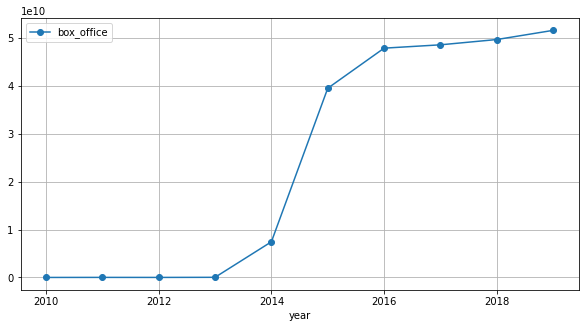

In [134]:
df_box_din = (df.pivot_table(index = 'year',
              values = 'box_office',
              aggfunc = 'sum')
             )
print(df_box_din.plot(kind = 'line', 
                      style = 'o-', 
                      grid = True, 
                      figsize = (10,5)))
plt.ticklabel_format(style='sci');
df_box_din

- Резкий скачок кассовых сборов можно объяснить не менее резким скачком курса рубля, начавшимся в 2014 году. 
- Сумма сборов в 2013 году около 30 млл. рублей, а в 2014м резко возросла до 8 млрд.
- Максимальные сборы наблюдаются в 2019 году - около 51 млрд. рублей
- Минимальные сборы наблюдаются в 2010 году - около 2,5 млн. рублей. 
- Разница колоссальная за десять лет. При этом после скачка курса рубля минимальные сборы отмечаются в 2014 году- 7,5 млрд. рублей.

#### 3.4 Средняя и медиана сборов по годам. Сравнение и выводы

- С помощью сводной таблицы считаем среднюю и медианную сумму сборов для каждого года.

In [135]:
(df.pivot_table(index = 'year',
              values = 'box_office',
              aggfunc = ['median','mean'])
)

,median,mean
,box_office,box_office
year,,
2010,1700.000,2.313004e+04
2011,3000.000,1.293832e+05
2012,5660.000,5.433924e+04
2013,3522.500,1.619549e+05
2014,18160.000,2.668442e+07
2015,4920933.000,8.494057e+07
2016,3846679.410,9.100057e+07
2017,9968340.000,1.360328e+08


Медиана и среднее по годам так же попадают под влияние скачка курса рубля. 
При этом хочется отметить неадекватные цифры, внесенные в базу. Как минимум фильм "Аватар" до 2019 года считался самым кассовым фильмом в РФ. Но тут у него стоит значение 6950. Если это в рублях, то значение крайне неадекватное. Привести можно много примеров, как минимум анимационные фильмы о трех богатырях, которые всегда собирают кассу.

In [136]:
df.query('year== 2010 and box_office > 5e+03').head()

,title,puNumber,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre,support_ratio,box_ratio,box_info
3790,Белка и Стрелка. Звездные собаки,114000310,2010-01-29,2010,Анимационный,"ОАО ""ЦНФ""",Россия,"С.Ушаков, И.Евланникова",С.А.Зернов,0+,NaN,NaN,NaN,NaN,6.0,"мультфильм,комедия,приключения",22247.0,С.Ушаков,мультфильм,NaN,NaN,True
3802,Буду помнить,111000910,2010-01-28,2010,Художественный,"ООО ""ГРИНСИТИ""",Россия,В.Воробьев,А.Сафронов,16+,NaN,NaN,NaN,NaN,7.2,военный,32175.0,В.Воробьев,военный,NaN,NaN,True
3827,Алиса в стране чудес /По книгам Льюиса Кэрролл...,121002610,2010-02-25,2010,Художественный,"Рот Филмз, Тим Тодд, Тим Бартон Продакшнз, Уол...",США,Тим Бартон,"Тим Бартон, Ричард Д.Занук, Джо Рот, Дженнифер...",12+,NaN,NaN,NaN,NaN,7.1,"фэнтези,приключения,семейный",7503.0,Тим Бартон,фэнтези,NaN,NaN,True
3923,Аватар,121008910,2010-05-12,2010,Художественный,"ХХ век Фокс, Дан Интертейнмент, Гиант Студиос,...",США,Джеймс Кэмерон,"Брук Бретон, Джеймс Кэмерон, Джон Лондау",16+,NaN,NaN,NaN,NaN,7.9,"фантастика,боевик,драма",6950.0,Джеймс Кэмерон,фантастика,NaN,NaN,True
3952,Океаны,123000110,2010-08-19,2010,Научно-популярный,Патэ,"Франция, Испания, Швейцария","Жак Перрен, Жак Клюзо","Джейк Эбертс, Дон Хан, Николя Моверне",0+,NaN,NaN,NaN,NaN,8.3,"документальный,драма,семейный",5830.0,Жак Перрен,документальный,NaN,NaN,True


In [137]:
df.query('director == "Джеймс Кэмерон"').head()

,title,puNumber,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre,support_ratio,box_ratio,box_info
3892,Аватар,221082410,2010-07-15,2010,Художественный,"ХХ век Фокс, Дан Интертейнмент, Гиант Студиос,...",США,Джеймс Кэмерон,"Брук Бретон, Джеймс Кэмерон, Джон Лондау",16+,NaN,NaN,NaN,NaN,7.9,"фантастика,боевик,драма",NaN,Джеймс Кэмерон,фантастика,NaN,NaN,False
3923,Аватар,121008910,2010-05-12,2010,Художественный,"ХХ век Фокс, Дан Интертейнмент, Гиант Студиос,...",США,Джеймс Кэмерон,"Брук Бретон, Джеймс Кэмерон, Джон Лондау",16+,NaN,NaN,NaN,NaN,7.9,"фантастика,боевик,драма",6950.0,Джеймс Кэмерон,фантастика,NaN,NaN,True
3988,Аватар,221067810,2010-05-14,2010,Художественный,"ХХ век Фокс, Дан Интертейнмент, Гиант Студиос,...",США,Джеймс Кэмерон,"Брук Бретон, Джеймс Кэмерон, Джон Лондау",16+,NaN,NaN,NaN,NaN,7.9,"фантастика,боевик,драма",NaN,Джеймс Кэмерон,фантастика,NaN,NaN,False
4248,Аватар. Специальная версия,121014010,2010-08-23,2010,Художественный,"ХХ век Фокс, Дан Интертейнмент, Гиант Студиос,...",США,Джеймс Кэмерон,"Брук Бретон, Джеймс Кэмерон, Джон Лондау",16+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Джеймс Кэмерон,NaN,NaN,NaN,False


#### 3.5 Зависимость сборов от ограничения по возрасту

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год.
- Узнаем, какие фильмы с каким возрастным ограничением собрали больше всего денег в прокате, а так же увидим,  меняется ли картина в зависимости от года. 

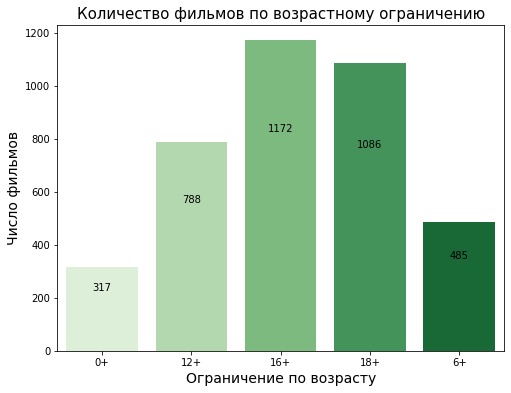

In [138]:
df_box = (df.query('year >2014')
          .groupby(['age_restriction'])
          .agg(count=('title', 'count'), vi = ('box_info', 'count'))
         )
df_box = df_box.reset_index()
df_box
plt.figure(figsize=(8, 6))
sns.barplot(x="age_restriction", y="count", 
            data=df_box,
            palette='Greens')

def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')
ax = plt.gca()
autolabel(ax.patches, height_factor=0.70)

plt.ylabel("Число фильмов", size=14)
plt.xlabel("Ограничение по возрасту", size=14)
plt.title("Количество фильмов по возрастному ограничению", size=15);

Картины с ограничением 16+ доминируют в прокате. 

In [139]:
(df.query('year >= 2015')
 .pivot_table(index = 'year',
              columns = 'age_restriction',
              values = 'box_office',
              margins = True,
              aggfunc = ['sum'])
)

sum                                            \
age_restriction            0+           12+           16+           18+   
year                                                                      
2015             3.790546e+08  1.361608e+10  1.136812e+10  5.432308e+09   
2016             1.502288e+08  1.220445e+10  1.666455e+10  6.793930e+09   
2017             2.295989e+08  7.851428e+09  1.874504e+10  9.651496e+09   
2018             3.244900e+07  1.426729e+10  1.650360e+10  8.760086e+09   
2019             1.774607e+07  1.582925e+10  1.276052e+10  1.012180e+10   
All              8.090774e+08  6.376850e+10  7.604184e+10  4.075962e+10   

                                             
age_restriction            6+           All  
year                                         
2015             8.701799e+09  3.949737e+10  
2016             1.205315e+10  4.786630e+10  
2017             1.208614e+10  4.856371e+10  
2018             1.010497e+10  4.966840e+10  
2019             1.285255e+10  5.158187e+10  
All              5.579861e+10  2.371776e+11

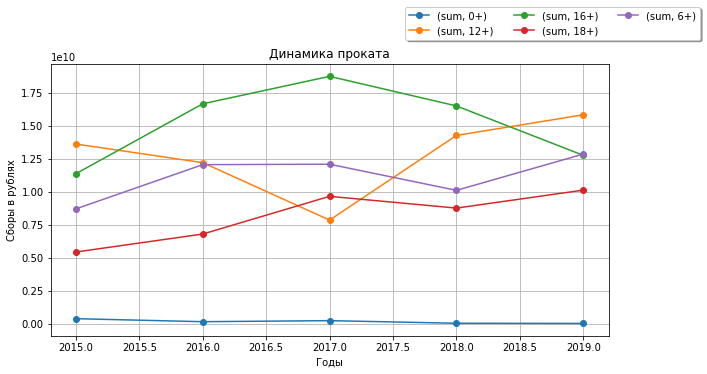

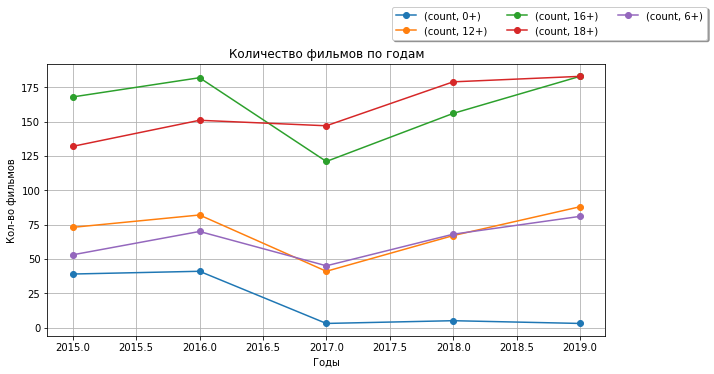

In [140]:
(df.query('year >= 2015')
 .pivot_table(index = 'year',
              columns = 'age_restriction',
              values = 'box_office',
              aggfunc = ['sum'])
       .plot(kind = 'line', figsize = (10,5), grid=True, style = 'o-') 
)
plt.legend(loc='center', bbox_to_anchor=(0.9, 1.15),
          ncol=3, fancybox=True, shadow=True)

plt.xlabel('Годы')
plt.ylabel('Сборы в рублях')
plt.title('Динамика проката')
(df.query('year >= 2015')
 .pivot_table(index = 'year',
              columns = 'age_restriction',
              values = 'box_office',
              aggfunc = ['count'])
 .plot(kind = 'line', figsize = (10,5), grid=True, style = 'o-')
 
)
plt.xlabel('Годы')
plt.ylabel('Кол-во фильмов')
plt.title('Количество фильмов по годам')
plt.legend(loc='center', bbox_to_anchor=(0.9, 1.15),
          ncol=3, fancybox=True, shadow=True)


- Фильмы **16+** на проятжении 3х лет, с 2015 по 2018 год доминируют и по сборам в прокате, несмотря на то, что пик по количеству фильмов с данным ограниченимем приходится на 2016й. 
- В 2019 первенство перехватывают фильмы **12+**, при том, что их выходит меньше, чем **16+**. 
- Фильмы с самой жесткой меткой **18+** с 2017го года доминируют по числу премьер, при этом сборы к 2019 году остаются на 4м месте. 
- Ограничение по возрасту обычно сужает аудиторию, которая может посетить фильм и составить ему кассу. Поэтому уменьшение сборов даже при большом выпуске картин **18+** объяснимо.
- Фильмы **6+** и **12+** идут примерно одинаково по количеству, и **12+** немного опережает **6+** по сборам.
- Фильмы **0+**, рассчитаннные в основном на самую юную аудиорию, находятся внизу списка по обоим параметрам. При этом в рамках данного исследования замечу, что из 317 картин **0+** данные по прокату есть только у 90. 

In [141]:
df.query('age_restriction == "0+" and box_info == True and year>2014').head()

,title,puNumber,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre,support_ratio,box_ratio,box_info
124,Галапагосы 3D,126004116,2016-08-11,2016,Документальный,"Аймакс Корпорэйшн, Мандэлэй Медиа Артс","США, Канада","Эл Гиддингс, Дэвид Кларк","Эл Гиддингс, Дэвид Кларк",0+,NaN,NaN,NaN,NaN,6.8,документальный,102940.0,Эл Гиддингс,документальный,NaN,NaN,True
351,Волшебное приключение,124000905,2015-01-18,2015,Анимационный,"Экшион Филмз, Патэ Синема, Болексбразерс","Великобритания, Франция",Дэйв Бортвик,"Клауди Горский, Энди Лэйтон, Лаурен Родон, Пас...",0+,NaN,NaN,NaN,NaN,5.7,"мультфильм,фэнтези,комедия",100.0,Дэйв Бортвик,мультфильм,NaN,NaN,True
887,Арктика 3D,126003016,2016-07-01,2016,Прочие,"МакГиливрэй, Фримен Филмз, Аймакс",США,Грэг МакГиливрэй,"Грег МакГиливрэй, Шон МакГиливрэй",0+,NaN,NaN,NaN,NaN,7.7,"документальный,короткометражка",45300.0,Грэг МакГиливрэй,документальный,NaN,NaN,True
1034,Монстры на острове,124002515,2015-06-25,2015,Анимационный,"Аби Шуи, Хакайдо Медиа Партнерс, Джи Дрим, Роб...","Япония, Канада",Такаши Ямадзаки,Генки Хавамура,0+,NaN,NaN,NaN,NaN,7.1,"мультфильм,фэнтези,приключения",120.0,Такаши Ямадзаки,мультфильм,NaN,NaN,True
1867,Снежные приключения Солана и Людвига,124001015,2015-03-03,2015,Анимационный,"Майпо Фильм, Квистен Анимейшн, Аукрустстифтель...",Норвегия,Расмус А.Сивертсен,"Корнелия Бойсен, Синнёве Хёрсдаль",0+,NaN,NaN,NaN,NaN,6.5,"мультфильм,семейный",1212329.5,Расмус А.Сивертсен,мультфильм,NaN,NaN,True


### 4. Анализ фильмов, получивших государственную поддержку

Проведу несколько исследований:
1. Динамика проката по годам
2. Поиск самого популярного жанра
3. Расчет НВП и ВП по годам.
4. Самые кассовые фильмы, получившие поддержку.
5. Средняя оценка фильмов, получивших поддержку
6. Окупаемость.
7. Распределение поддержки по возрастным категориям.

Создам для удобства отдельный столбец, где указана вся поддержка

In [142]:
df['sup_sum'] = df['refundable_support']+df['nonrefundable_support']

In [143]:
def sup(row):
    if row > 0:
        return True
    else:
        return False 

In [144]:
df['sup_fact'] = df['sup_sum'].apply(sup)
df.query('sup_sum >0').head()

,title,puNumber,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre,support_ratio,box_ratio,box_info,sup_sum,sup_fact
1281,Пока еще жива,111005313,2013-10-11,2013,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16+,0.0,26500000.0,26500000.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,А.Атанесян,драма,100.0,0.0138,True,26500000.0,True
1448,Бесславные придурки,111003314,2014-03-28,2014,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12+,0.0,26000000.0,26000000.0,Министерство культуры,NaN,NaN,28140.0,А.Якимчук,NaN,100.0,0.0011,True,26000000.0,True
1498,Невидимки,111004213,2013-09-10,2013,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12+,0.0,107847945.0,107847945.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,Р.Давлетьяров,комедия,100.0,0.1850,True,107847945.0,True
1524,БЕРЦЫ,111004314,2014-05-05,2014,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16+,0.0,28000000.0,28000000.0,Министерство культуры,4.2,драма,55917.5,Е.Миндадзе (псевдоним Катя Шагалова),драма,100.0,0.0020,True,28000000.0,True
1792,Братья Ч,111004414,2014-04-23,2014,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16+,0.0,25000000.0,25000000.0,Министерство культуры,6.4,драма,232100.0,М.Угаров,драма,100.0,0.0093,True,25000000.0,True


С подержкой у нас имеется 332 картины.
Поддержка выдяеляется с 2013 года, поэтому исследования будут так же проводиться во временной промежуток 2013-2019 гг.

#### 4.1 Динамика проката по годам.

In [145]:
df['sup_fact'].sum()

332

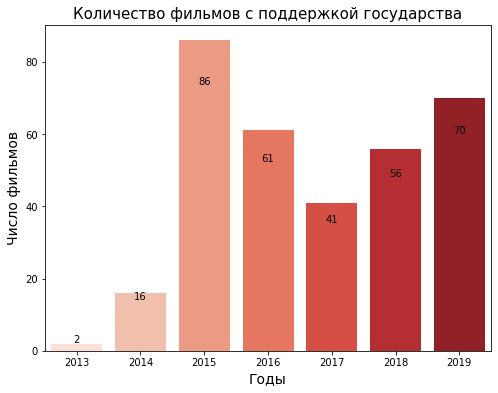

In [146]:
data_df = (df.query('year >=2013 ')
           .groupby(['year']).agg(count=('sup_fact', 'sum'))
          )
data_df = data_df.reset_index()
data_df

plt.figure(figsize=(8, 6))
sns.barplot(x="year", y="count", 
            data=data_df,
            palette='Reds')

def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')
ax = plt.gca()
autolabel(ax.patches, height_factor=0.85)

plt.ylabel("Число фильмов", size=14)
plt.xlabel("Годы", size=14)
plt.title("Количество фильмов с поддержкой государства", size=15);

Программа поддержки была максимальной в 2015 году, минимальной в 2017, если не брать расчет динамику до 2015 года, когда программа только начала набирать обороты.

#### 4.2 Поиск самого популярного жанра

драма          93
комедия        74
мультфильм     31
триллер        15
мелодрама      15
фантастика     11
фэнтези        11
ужасы          10
военный         9
приключения     7
Name: main_genre, dtype: int64

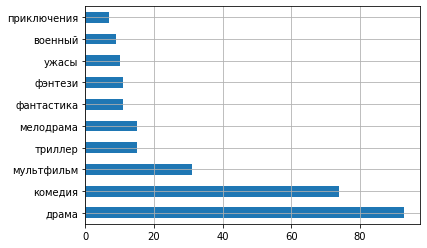

In [147]:
df_top = df.query('sup_fact == True')
df_top = df_top['main_genre'].iloc[:].value_counts(ascending = False)[0:10]
df_top.plot.barh(grid=True)
df_top

Драма и комедия идут с большим отрывом от других жанров и составляют **28%** и **23%** соответстственно от общего числа картин.


#### 4.3 Рассчет возвратной/невозвратной поддержки по годам

               sum
        box_office
year              
2013  2.979971e+07
2014  7.444952e+09
2015  3.949737e+10
2016  4.786630e+10
2017  4.856371e+10
2018  4.966840e+10
2019  5.158187e+10


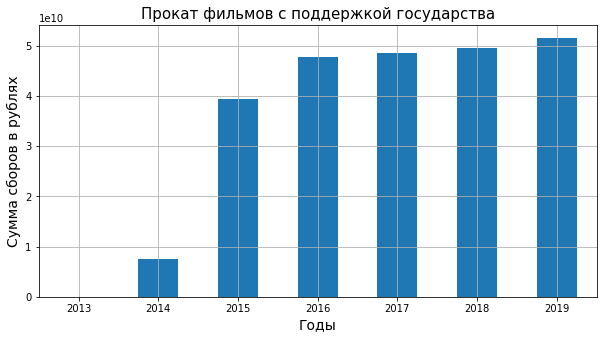

In [148]:
din_ru = (df.query('year >= 2013')
          .pivot_table(index = 'year',
              values = ['box_office'],
              aggfunc =['sum'])
         )
print(din_ru)
din_ru = din_ru.plot(kind = 'bar', grid = True, figsize = (10,5),style ="o-", legend = False)
plt.ylabel("Cумма сборов в рублях", size=14)
plt.xlabel("Годы", size=14)
plt.title("Прокат фильмов с поддержкой государства", size=15)
plt.xticks(rotation = 0);

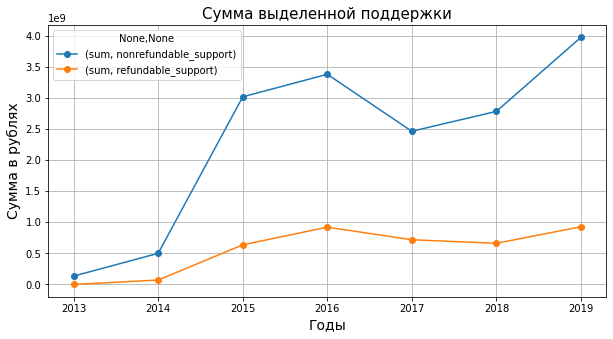

In [149]:
df.query('year >= 2013').pivot_table(index = 'year',
              values = ['refundable_support','nonrefundable_support'],
              aggfunc =['sum']).plot(kind = 'line', grid = True, figsize = (10,5),style ="o-")
plt.ylabel("Cумма в рублях", size=14)
plt.xlabel("Годы", size=14)
plt.title("Сумма выделенной поддержки", size=15)
plt.xticks(rotation = 0);

В 2013м году ВП не оказывылась. С началом кризиса 2014 года МК и ФК начали достаточно усиленно оказывать поддержку российскому кинопроизводству. Мотивом было и остается стремление к тому, чтобы фильмы производства РФ могли успешно конкурировать на рынке кинопроката с зарубежными фильмами, в особенности с голливудскими, имещими достаточно высокий уровень качества.

#### 4.4 Самые кассовые фильмы получившие поддержку

In [150]:
(df.query('year >= 2013')
 .pivot_table(index = 'year',
              values = 'box_office',
               aggfunc = 'max')
)

,box_office
year,
2013,1.995703e+07
2014,1.016411e+09
2015,1.658861e+09
2016,2.048126e+09
2017,2.779686e+09
2018,2.271754e+09
2019,3.073569e+09


<AxesSubplot:xlabel='year'>

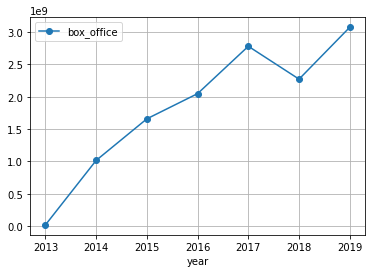

In [151]:
(df.query('year >= 2013')
 .pivot_table(index = 'year',
              values = 'box_office',
               aggfunc = 'max')
 .plot(kind = 'line',style = 'o-',grid=True)
)


Если обратиться к информации о самых кассовых фильмах промежутка 2017-2019, то видно, что кассовым лидером 2018 года является военный боевик "Т-34", с ограничением 12+. "Холоп" и "Движение вверх" являются комедией и спортивной драмой соответственно. Эти жанры более популярные по сравнению с жанром "военный". Этим объясняю разницу в сборах.

In [152]:
df.query('box_office > 2.271754e+09 and production_country == "Россия"')

,title,puNumber,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre,support_ratio,box_ratio,box_info,sup_sum,sup_fact
5650,Движение вверх,111011817,2017-12-21,2017,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",6+,0.0,400000000.0,400000000.0,Фонд кино,7.5,"спорт,драма",2.779686e+09,А.Мегердичев,спорт,100.0,6.9492,True,400000000.0,True
6545,Т-34,111024918,2018-12-21,2018,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",12+,60000000.0,120000000.0,180000000.0,Фонд кино,6.5,"драма,военный,боевик",2.271754e+09,А.Сидоров,драма,100.0,12.6209,True,180000000.0,True
7452,Холоп,111021719,2019-12-19,2019,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",12+,25000000.0,35000000.0,60000000.0,Фонд кино,6.8,комедия,3.073569e+09,К.Шипенко,комедия,100.0,51.2261,True,60000000.0,True


In [153]:
df.query('sup_fact == True and box_ratio >1').head()

,title,puNumber,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre,support_ratio,box_ratio,box_info,sup_sum,sup_fact
1870,А зори здесь тихие,111002915,2015-03-16,2015,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,12+,50000000.0,100000000.0,150000000.0,Фонд кино,8.5,"драма,военный,история",249166767.7,Р.Давлетьяров,драма,100.0,1.6611,True,150000000.0,True
1903,Призрак,111001815,2015-03-02,2015,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,6+,0.0,75000000.0,75000000.0,Фонд кино,7.0,"триллер,боевик,приключения",352804320.4,А.Войтинский,триллер,100.0,4.7041,True,75000000.0,True
1987,Елки Лохматые,111023114,2014-12-10,2014,Художественный,"ООО ""ТаББаК""",Россия,Максим Свешников,"Тимур Бекмамбетов, Евгения Аронова",6+,26000000.0,30000000.0,56000000.0,Фонд кино,5.0,"семейный,комедия",121225633.8,Максим Свешников,семейный,100.0,2.1647,True,56000000.0,True
1997,Овечка Долли была злая и рано умерла,111015214,2014-11-10,2014,Художественный,"ООО ""Пиманов и партнеры""",Россия,А.Пиманов,"А.Пиманов, О.Погодина",12+,0.0,25000000.0,25000000.0,Фонд кино,6.6,"фантастика,комедия,приключения",43534847.1,А.Пиманов,фантастика,100.0,1.7414,True,25000000.0,True
2005,Снежная Королева 2: Перезаморозка,114000214,2014-11-13,2014,Анимационный,"ООО ""ВИЗАРТ ФИЛЬМ""",Россия,А.Цицилин,"ООО ""ВИЗАРТ ФИЛЬМ"", ООО ""ТаББаК""",0+,30000000.0,40000000.0,70000000.0,Фонд кино,6.5,"мультфильм,фэнтези,приключения",313489846.5,А.Цицилин,мультфильм,100.0,4.4784,True,70000000.0,True


#### 4.5 Средняя оценка фильмов, получивших поддержку

In [154]:
(df.query('sup_fact == True and year > 2013')
 .pivot_table(index = 'year',
               values = 'ratings',
              aggfunc = ['mean','median'])
)

,mean,median
,ratings,ratings
year,,
2014,6.006667,6.4
2015,6.139759,6.2
2016,5.677193,5.8
2017,6.000000,6.2
2018,6.001887,6.2
2019,6.176119,6.2


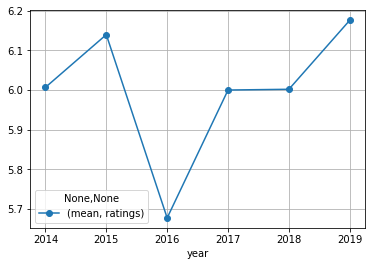

In [155]:
(df.query('sup_fact == True and year > 2013')
 .pivot_table(index = 'year',
             values = 'ratings',
             aggfunc = ['mean'])
 .plot(kind='line', grid = True, style = 'o-')
);

Конкурировать российское кино пытается всеми силами, но зритель есть зритель. Средняя оценка фильмов с 2014 года не выходит за пределы 6,2. Показатель средний. Опять же серьезно ориентироваться на этот показатель при анализе сборов не стоит. 
Есть фильмы, например "Самый лучший фильм",у которого была очень большая рекламная кампания, сборы около 50 млн. $, а оценка около 3.1.

In [156]:
df.query('sup_fact == True and nonrefundable_support > 3e+08')

,title,puNumber,show_start_date,year,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_director,main_genre,support_ratio,box_ratio,box_info,sup_sum,sup_fact
2919,Экипаж,111005416,2016-03-21,2016,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",6+,50000000.0,392104482.0,442104482.0,Фонд кино,7.6,"драма,триллер,приключения",1.402255e+09,Н.Лебедев,драма,100.0,3.1718,True,442104482.0,True
5650,Движение вверх,111011817,2017-12-21,2017,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",6+,0.0,400000000.0,400000000.0,Фонд кино,7.5,"спорт,драма",2.779686e+09,А.Мегердичев,спорт,100.0,6.9492,True,400000000.0,True
7460,Союз спасения,111022019,2019-12-26,2019,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",12+,100000000.0,400000000.0,500000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08,А.Кравчук,история,100.0,1.4354,True,500000000.0,True
7470,Вторжение,111022519,2019-12-23,2019,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",12+,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",2.122229e+09,Ф.Бондарчук,фантастика,100.0,NaN,True,500000000.0,True


#### 4.6. Окупаемость

Создаю отдельный булевы столбец для окупившихся картин

In [157]:
def money(row):
    if row >= 1:
        return True
    else:
        return False 

In [158]:
df['profit']=df['box_ratio'].apply(money)

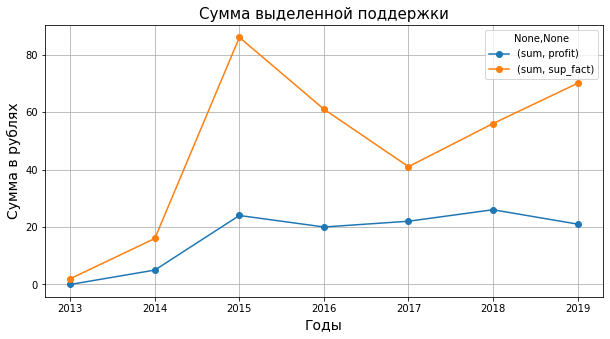

In [159]:
df.query('year >= 2013 and sup_fact == True').pivot_table(index = 'year',
              values = ['profit','sup_fact'],
              aggfunc =['sum']).plot(kind = 'line', grid = True, figsize = (10,5),style ="o-")
plt.ylabel("Cумма в рублях", size=14)
plt.xlabel("Годы", size=14)
plt.title("Сумма выделенной поддержки", size=15)
plt.xticks(rotation = 0);

В 2015 году хороша видно, как мало окупилось картин по сравнению с общим числом вышедших в тот год.

Text(0.5, 1.0, 'Доля окупившихся фильмов')

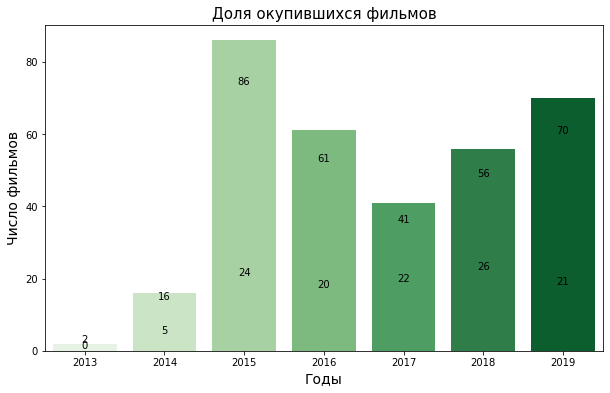

In [160]:
box_ratio = (df.query('year >= 2013 and sup_fact == True')
             .groupby(['year'])
             .agg(count=('profit', 'sum'), 
                  vi = ('sup_fact', 'sum'))
            )
box_ratio= box_ratio.reset_index()
box_ratio

plt.figure(figsize=(10, 6))
sns.barplot(x="year", y="count", 
            data=box_ratio,
            palette='Greens')

sns.barplot(x="year", y="vi", 
            data=box_ratio,
            palette='Greens')

def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')
ax = plt.gca()
autolabel(ax.patches, height_factor=0.85)

plt.ylabel("Число фильмов", size=14)
plt.xlabel("Годы", size=14)
plt.title("Доля окупившихся фильмов", size=15)

        profit
year          
2013  0.000000
2014  0.312500
2015  0.279070
2016  0.327869
2017  0.536585
2018  0.464286
2019  0.300000


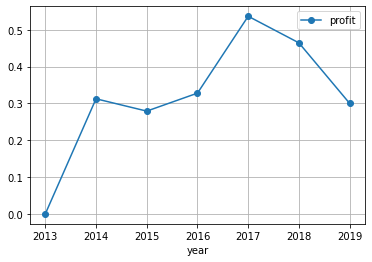

In [161]:
box_mean = (df.query('year >= 2013 and sup_fact == True')
            .pivot_table(index = 'year',
             values ='profit',
             aggfunc = 'mean')
           )      
print(box_mean)
box_mean = box_mean.plot(kind = 'line',grid=True,style = "o-")

 - Из 332 картин, окупилось 120 - это всего **36%**. Конкуренцию с зарубежными картинами составлять сложно. 
 - В 2017 году был максимальный процент окупившихся фильмов - около **53%**
 - В 2015 году был минимальный процент окупившихся фильмов - всего **28%**

#### 4.7 Распределение поддержки по возрастным категориям.

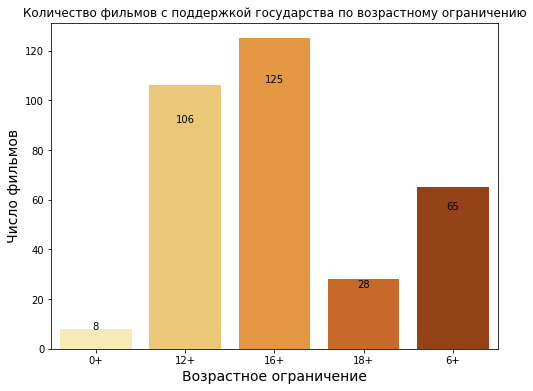

In [162]:
age_ru = (df.query('year >=2013 ')
           .groupby(['age_restriction']).agg(count=('sup_fact', 'sum'))
          )
age_ru = age_ru.reset_index()
age_ru

plt.figure(figsize=(8, 6))
sns.barplot(x="age_restriction", y="count", 
            data=age_ru,
            palette='YlOrBr')

def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')
ax = plt.gca()
autolabel(ax.patches, height_factor=0.85)

plt.ylabel("Число фильмов", size=14)
plt.xlabel("Возрастное ограничение", size=14)
plt.title("Количество фильмов с поддержкой государства по возрастному ограничению", size=12);

Поддержка больше всего выделена фильмам категории *16+* и *12+*

### 5. Вывод

На основании данных Министерства Культуры РФ и сайта КиноПоиск проведено исследование, целью которого является изучение рынка российского кинопроката за период 2010-2019 гг, поиск и выявление текущих трендов.

Выдвинуты следующие гипотезы.
 1. Сумма сборов увеличивается с каждым годом.
 2. Возрастные ограничения влияют на сборы.
 3. Картины, получившие поддержку государства, окупаются в полном размере.
 4. Картины, получившие поддержку государства, имеют высокий рейтинг.
 
 
**Гипотеза 1 - подтверждена частично**

 - С 2010 по 2019 гг. годовое значение суммы сборов выросло 2.5 млн руб. до 51 млрд.руб. 
 - Частичность подтверждения гипотезы основана на том, что из за скачка курса рубля в 2014м году адекватно оценить сборы до и после этого скачка не представлется возможным. 
 - Так же необходимо учесть, что данные о прокате есть только у **42%** записей в датасете, меньше половины. 
 - Для более адекватного анализа требуется заполнение недостащих данных, насколько это возможно.
 
**Гипотеза 2 - подтверждена** 

За период 2015-2019 гг.

 - Молодежь от 12 до 18 лет составляет основную аудиторию, посещающую кинотеатры. 
  - Картины с ограничением *12+* принесли 64 млрд. рублей, что составляет **28%** от общего проката за период 2015-2019 гг.
  - Картины с ограничением *16+* принесли 76 млрд. рублей, что составляет **33%** от общего проката за период 2015-2019 гг.
 - Дети до 12 лет(0+ и 6+) обеспечили 56 млрд. рублей или **21%** от общего проката за период 2015-2019 гг.
 - Самый меленький процент - **18%** (40 млрд. рублей) составляют фильмы с ограничением *18+*, что подтверждает гипотезу о влянии ограничения на сборы.

**Гипотеза 3- не подтверждена** 
 - Из 332 картин, получивших поддержку, окупилось всего **36%** (120).
 - Максимальный процент окупишихся фильмов наблюдался в 2017 году - около **53%**.
 - Миниальный процент окупишихся фильмов наблюдался в 2017 году - около **28%**.

**Гипотеза 4 - не подтвреждена**  
Средняя оценка фильмов, получивших поддержку варьируется в среднем диапазоне - от **5.8** до **6.2**.

Рекомендации:
- Продолжать развивать систему поддержки кинопроизводства, более тщательно подходить к выбору фильмов для оказания поддержки.
- Продолжать делать упор на молодую аудиторию 12-18 лет.
- Для адекватного анализа данных по сборам необходимо модернизировать систему внесения данных в реестры, чтобы избегать потери данных. Так же необходимо внести изменения в контроль над фильмами с разными прокатными удостоверениями, чтобы исключать лишнее дублирование.

In [163]:
print('Код загружен')

Код загружен
